In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

# Read CSV into DataFrame
data = pd.read_csv('../data/Popularity_Reports_High_Star/PrTotalsWithPrandContributions_HighMar3Report.csv')

# Initialize empty lists to store summary statistics
coefficients = []
p_values = []
r_squared_values = []
correlation_coefficients = []  # Initialize list to store correlation coefficients
rmse_values = []  # Initialize list to store RMSE values

# Group by repository and perform regression for each group
for repo, group_data in data.groupby('Repository'):
    X = sm.add_constant(group_data[['Total Pull Requests Before Timestamp']])
    y = group_data['Percentage']
    try:
        model = sm.OLS(y, X).fit()
    except:
        print(f"Skipping repository {repo} due to error in model fitting.")
        continue


    # Store summary statistics
    coefficients.append(model.params['Total Pull Requests Before Timestamp'])
    p_values.append(model.pvalues['Total Pull Requests Before Timestamp'])
    r_squared_values.append(model.rsquared)
    
    # Calculate correlation coefficient
    correlation_coefficient = group_data['Total Pull Requests Before Timestamp'].corr(group_data['Percentage'])
    correlation_coefficients.append(correlation_coefficient)
    
    # Calculate RMSE
    predictions = model.predict(X)
    rmse = np.sqrt(((predictions - y) ** 2).mean())
    rmse_values.append(rmse)

    # Print summary statistics
    print(f"Repository: {repo}")
    print(f"Coefficient: {model.params['Total Pull Requests Before Timestamp']}")
    print(f"P-value: {model.pvalues['Total Pull Requests Before Timestamp']}")
    print(f"R-squared: {model.rsquared}")
    print(f"Correlation Coefficient: {correlation_coefficient}")
    print(f"RMSE: {rmse}")

    # Visualize results
    plt.figure()
    sns.scatterplot(x='Total Pull Requests Before Timestamp', y='Percentage', data=group_data)
    sns.regplot(x='Total Pull Requests Before Timestamp', y='Percentage', data=group_data, scatter=False)
    plt.title(f'Regression for Repository: {repo}')
    plt.xlabel('Total Pull Requests Before Timestamp')
    plt.ylabel('Code Coverage')
    plt.show()

# Create DataFrame for summary statistics
summary_df = pd.DataFrame({
    'Repository': data['Repository'].unique(),
    'Coefficient': coefficients,
    'P-value': p_values,
    'R-squared': r_squared_values,
    'Correlation Coefficient': correlation_coefficients,
    'RMSE': rmse_values  # Include RMSE values in summary DataFrame
})

# Print summary statistics
print(summary_df)

# Compare distributions of coefficients, p-values, R-squared, and RMSE values across repositories
plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1)
sns.boxplot(data=summary_df, y='Coefficient')
plt.title('Distribution of Coefficients')

plt.subplot(1, 4, 2)
sns.boxplot(data=summary_df, y='P-value')
plt.title('Distribution of P-values')

plt.subplot(1, 4, 3)
sns.boxplot(data=summary_df, y='R-squared')
plt.title('Distribution of R-squared Values')

plt.subplot(1, 4, 4)
sns.boxplot(data=summary_df, y='RMSE')
plt.title('Distribution of RMSE Values')

plt.tight_layout()
plt.show()


          Repository   Coefficient       P-value  R-squared  \
0                zfs  2.775558e-17  9.994669e-01       -inf   
1              citus  2.404876e-03  9.279959e-03   0.232987   
2             zephyr  7.518579e-03  1.485313e-05   0.326125   
3          pyroscope  6.457278e-02  2.242951e-12   0.645144   
4          mosquitto  4.473149e-03  2.238748e-01   0.030662   
...              ...           ...           ...        ...   
1039        compodoc -5.378657e-02  2.667305e-09   0.525269   
1040    ShapeShifter -1.073552e-03  1.036857e-10   0.584487   
1041        constate  8.403323e-05  9.746455e-01   0.000021   
1042  firebase-tools  3.324110e-03  3.864492e-02   0.086085   
1043  pro-components  6.359758e-02  9.690128e-24   0.879996   

      Correlation Coefficient  
0                         NaN  
1                    0.482687  
2                    0.571074  
3                    0.803209  
4                    0.175105  
...                       ...  
1039               

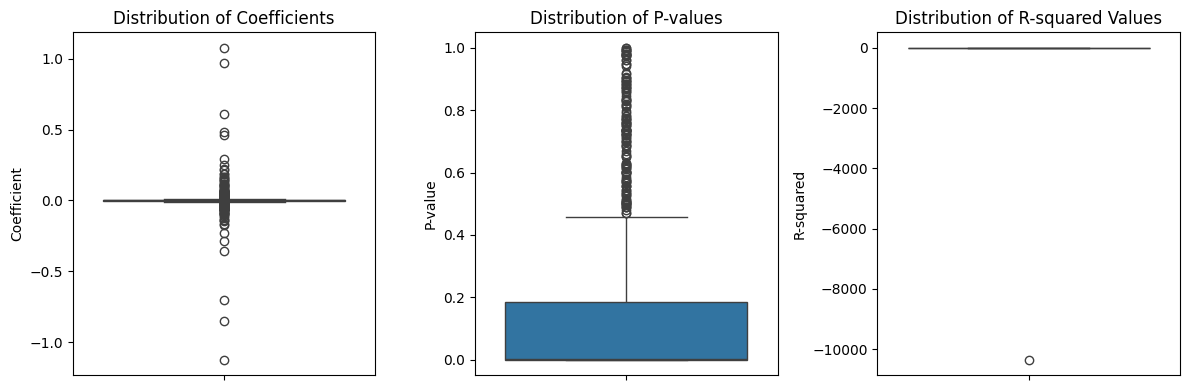

In [8]:
print(summary_df)

# Compare distributions of coefficients, p-values, and R-squared values across repositories
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(data=summary_df, y='Coefficient')
plt.title('Distribution of Coefficients')

plt.subplot(1, 3, 2)
sns.boxplot(data=summary_df, y='P-value')
plt.title('Distribution of P-values')

plt.subplot(1, 3, 3)
sns.boxplot(data=summary_df, y='R-squared')
plt.title('Distribution of R-squared Values')

plt.tight_layout()
plt.show()


In [14]:
# Define the threshold values for correlation coefficient
lower_threshold = 0.15
upper_threshold = 1.0

# Filter repositories based on correlation coefficient
filtered_repositories = summary_df[
    (summary_df['Correlation Coefficient'] >= lower_threshold) &
    (summary_df['Correlation Coefficient'] <= upper_threshold)
]

# Get the count of repositories within the specified range
repo_count_within_range = filtered_repositories.shape[0]

# Total count of repositories
total_repo_count = summary_df.shape[0]

# Calculate the percentage
percentage_within_range = (repo_count_within_range / total_repo_count) * 100

# Print the statistics
print(f"Number of repositories with correlation coefficient between {lower_threshold} and {upper_threshold}: {repo_count_within_range}")
print(f"Percentage of repositories within the specified range: {percentage_within_range:.2f}%")


Number of repositories with correlation coefficient between 0.15 and 1.0: 157
Percentage of repositories within the specified range: 44.86%


/Users/rajkunamaneni/Desktop/ECS 260/Code-Coverage-Trends/.venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/rajkunamaneni/Desktop/ECS 260/Code-Coverage-Trends/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/rajkunamaneni/Desktop/ECS 260/Code-Coverage-Trends/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Repository: Flutter-News-App
Coefficient: -6.678685382510707e-17
P-value: 0.8013388281971554
R-squared: -inf
Correlation Coefficient: nan
RMSE: 4.076997190223174e-14


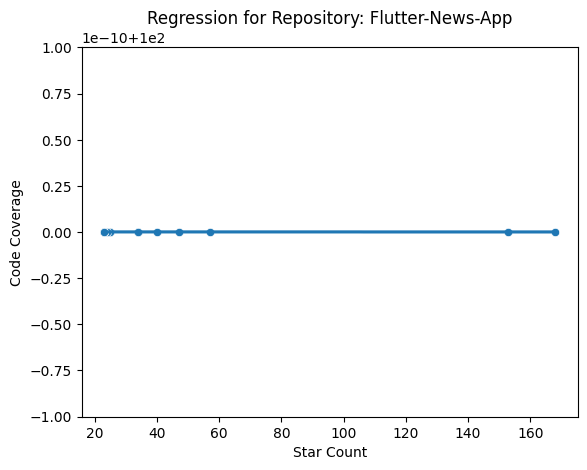

Repository: IntroViews-Flutter
Coefficient: 0.019242957702838678
P-value: 8.406112239583166e-05
R-squared: 0.4965564371401803
Correlation Coefficient: 0.7046676075570533
RMSE: 1.5567008753385174


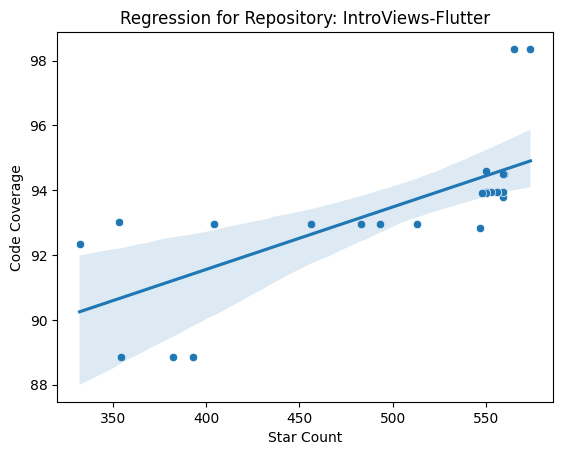

Repository: Kaiteki
Coefficient: -0.012928237239211389
P-value: 0.013892432757407978
R-squared: 0.11960465582171764
Correlation Coefficient: -0.3458390605783531
RMSE: 3.622017660777286


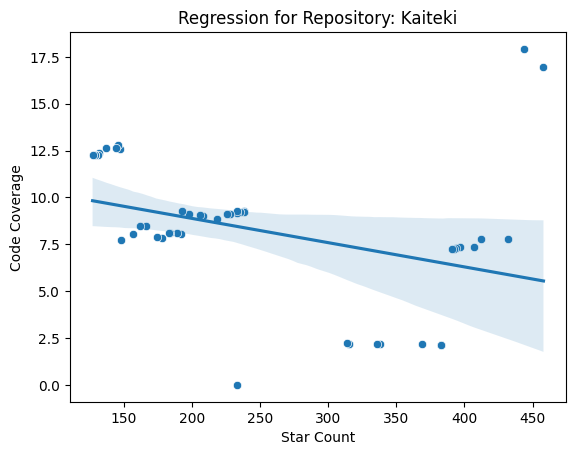

Repository: OCMockito
Coefficient: 0.002001644850262685
P-value: 2.6305416941574748e-05
R-squared: 0.31051490118324865
Correlation Coefficient: 0.557238639348751
RMSE: 0.6912835056094608


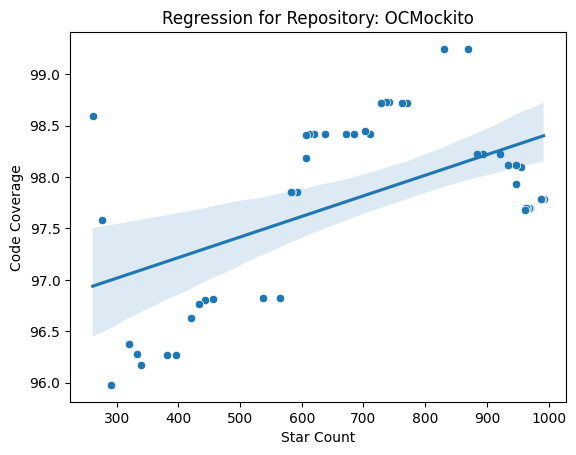

Repository: Parse-SDK-Flutter
Coefficient: 0.5504188441098319
P-value: 3.5557037149151097e-12
R-squared: 0.6383407900629507
Correlation Coefficient: 0.798962320803022
RMSE: 7.874785270755598


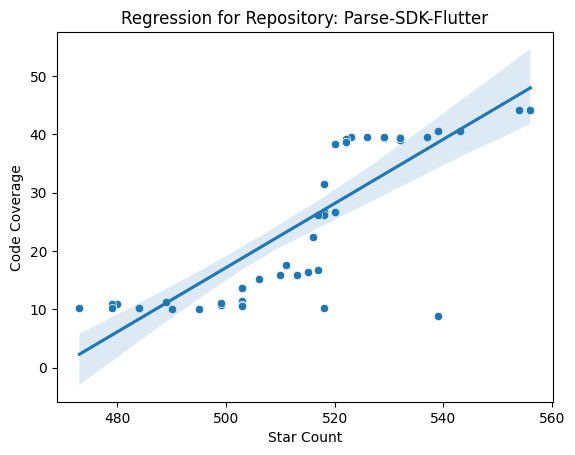

Repository: RedmineTimeTracker
Coefficient: 0.34768902781719846
P-value: 0.005561459889513318
R-squared: 0.24373956562616583
Correlation Coefficient: 0.49369987403904225
RMSE: 3.267368078188005


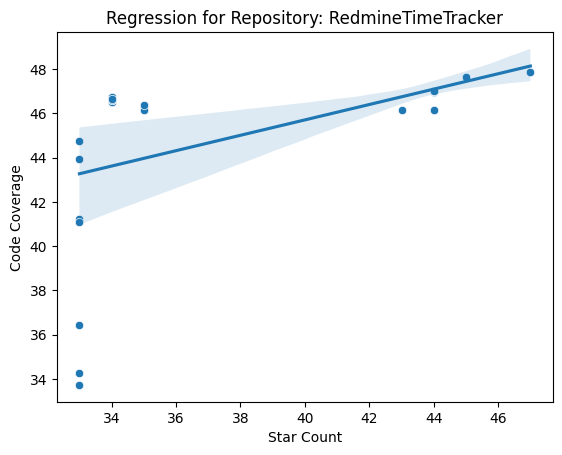

Repository: abao
Coefficient: -0.02096899439206292
P-value: 1.2995442060045115e-08
R-squared: 0.4935007367104788
Correlation Coefficient: -0.7024960759395589
RMSE: 1.5787371527576741


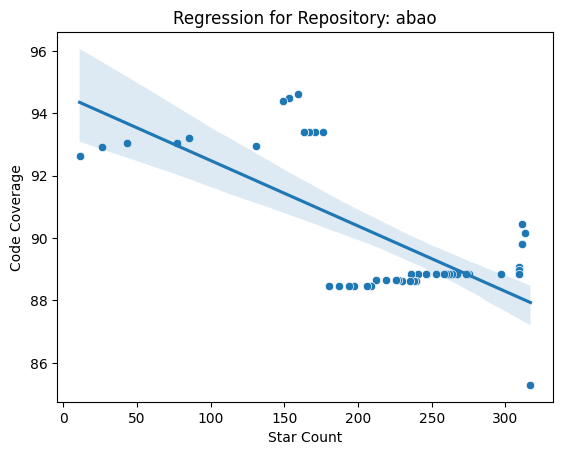

Repository: accord
Coefficient: 0.019306211718359556
P-value: 0.042960799952961225
R-squared: 0.0826261058502823
Correlation Coefficient: 0.2874475706112
RMSE: 0.42169095659006584


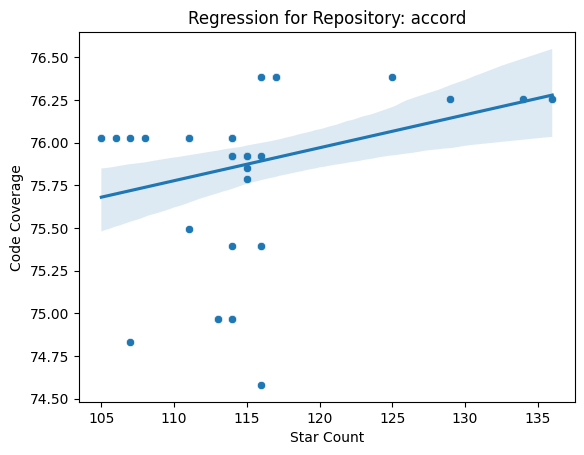

Repository: adaptive_theme
Coefficient: -0.056683392254948804
P-value: 0.31168984225984026
R-squared: 0.0850519230476463
Correlation Coefficient: -0.2916366284396498
RMSE: 11.76740593645754


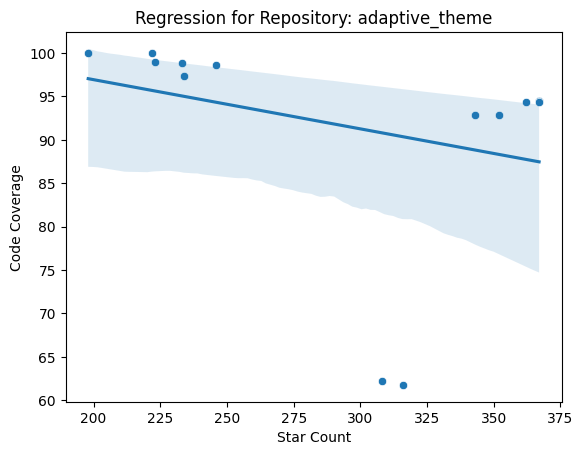

Repository: app-center
Coefficient: 0.19914322365795842
P-value: 8.936087445231022e-06
R-squared: 0.33973741709310634
Correlation Coefficient: 0.5828699830091669
RMSE: 13.83377095207856


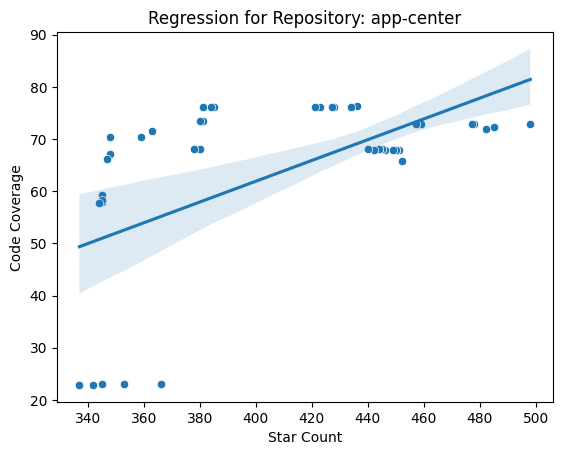

Repository: appainter
Coefficient: 0.007317215023527168
P-value: 1.3620586192640537e-05
R-squared: 0.3284638357246009
Correlation Coefficient: 0.5731176456231312
RMSE: 1.408598976835236


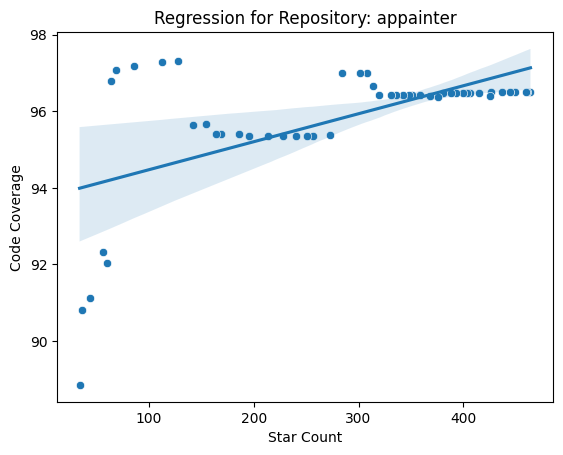

Repository: awesome_notifications
Coefficient: -0.005489523900848167
P-value: 0.011809916142052247
R-squared: 0.3536293015037535
Correlation Coefficient: -0.5946673872878395
RMSE: 0.126098053843062


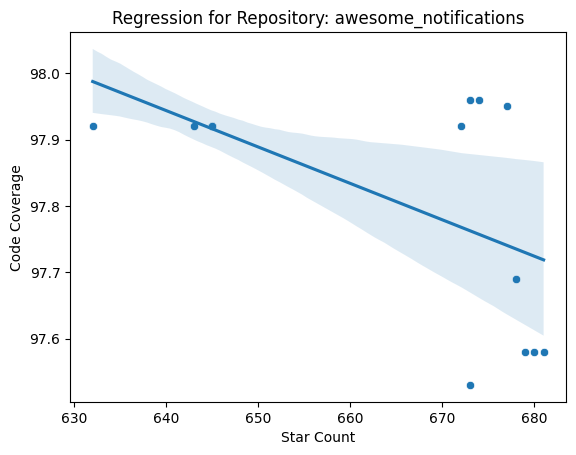

Repository: beamer
Coefficient: 0.007835098613292273
P-value: 0.0009802031738783815
R-squared: 0.2044087824852001
Correlation Coefficient: 0.45211589497074867
RMSE: 1.5227109928581466


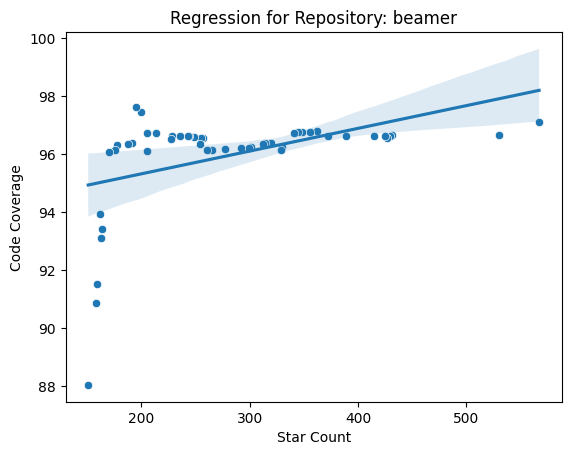

Repository: bot_toast
Coefficient: -0.0029735199166349147
P-value: 0.0047520179376993035
R-squared: 0.1544657233193999
Correlation Coefficient: -0.3930212759118762
RMSE: 1.4610693927642908


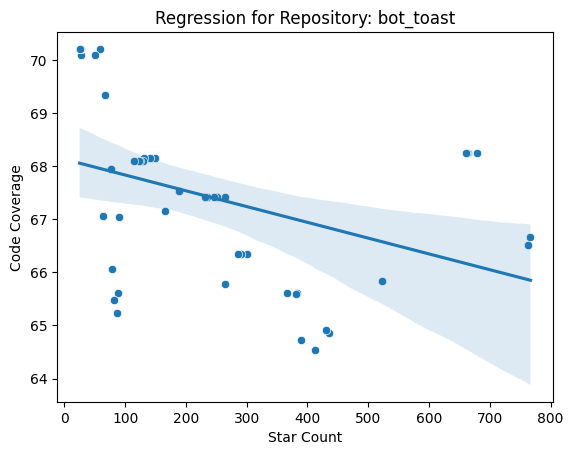

Repository: bottom_navy_bar
Coefficient: -0.01712621417078872
P-value: 0.5196468842504827
R-squared: 0.0615938005806963
Correlation Coefficient: -0.24818098351948054
RMSE: 1.9243528548693356


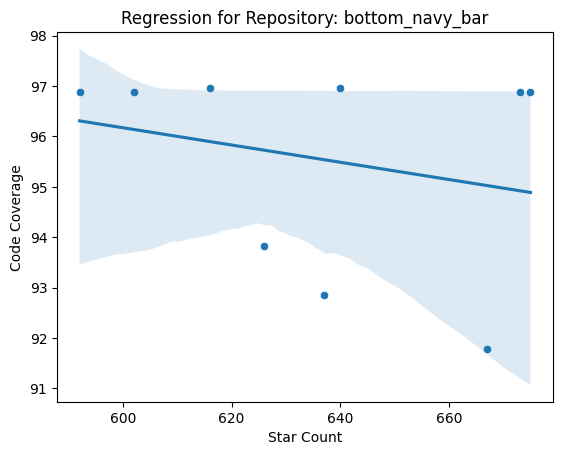

Repository: brauhausjs
Coefficient: 0.004148426159015637
P-value: 0.868121751899066
R-squared: 0.002392324023485659
Correlation Coefficient: 0.048911389506698384
RMSE: 0.49396105897878656


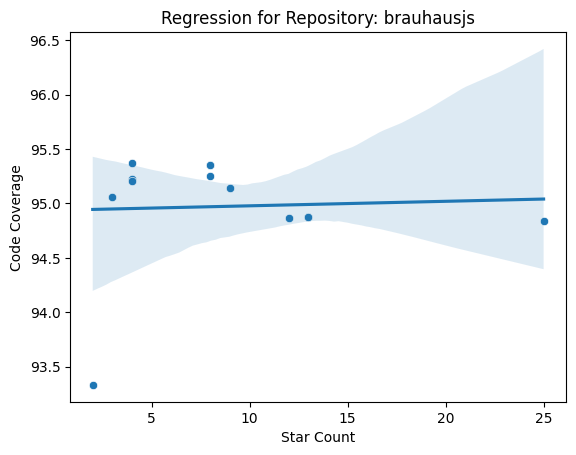

Repository: bumped
Coefficient: -0.006816372338510623
P-value: 0.287057141033154
R-squared: 0.023576283404716958
Correlation Coefficient: -0.1535457046117502
RMSE: 1.3769510637949742


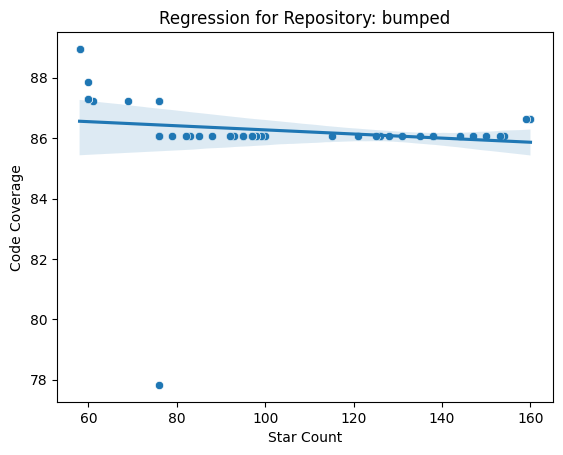

Repository: card_settings
Coefficient: 0.0004994068156976542
P-value: 0.41702181342256195
R-squared: 0.01788249038889589
Correlation Coefficient: 0.1337254291034292
RMSE: 0.29173409217656876


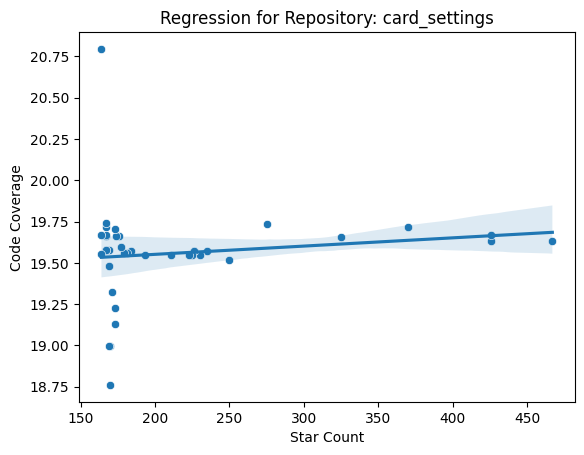

Repository: chopper
Coefficient: 0.012853876491359054
P-value: 3.0525735791729418e-24
R-squared: 0.8856206025147153
Correlation Coefficient: 0.9410741748208348
RMSE: 0.5488121975513252


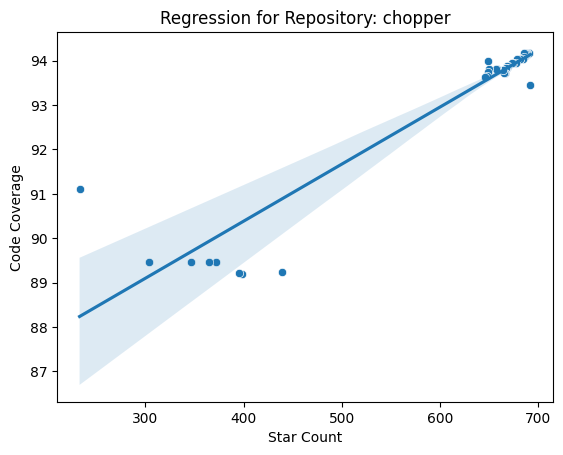

Repository: connect
Coefficient: -0.032463115818509324
P-value: 0.2058999324653308
R-squared: 0.03312091921494442
Correlation Coefficient: -0.1819915361079863
RMSE: 10.533256058445636


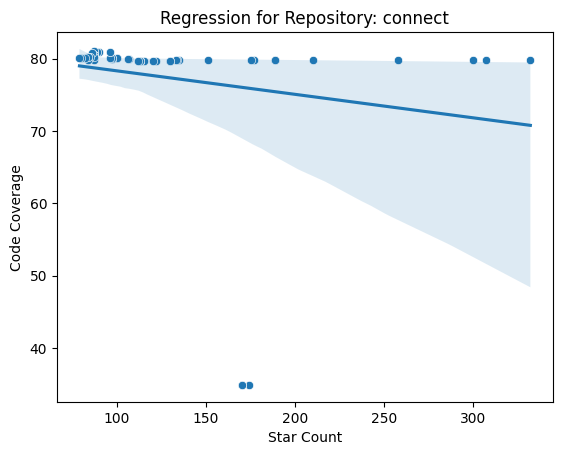

Repository: cookie_jar
Coefficient: -0.09915748031496067
P-value: 0.4947995710922007
R-squared: 0.1668253146828672
Correlation Coefficient: -0.40844254759129534
RMSE: 4.994527345162384


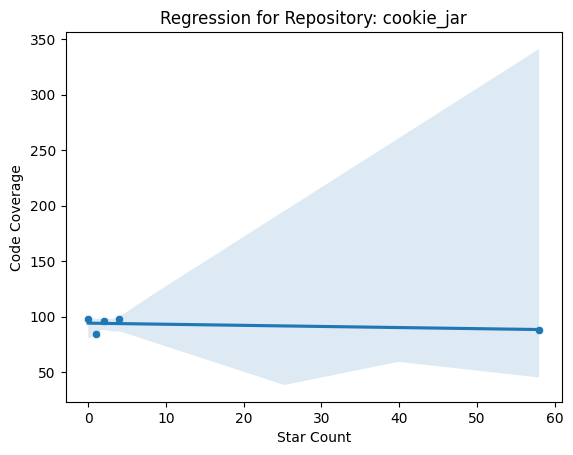

Repository: dart-code-metrics
Coefficient: 0.007641819959487428
P-value: 1.0373072737947109e-08
R-squared: 0.4981443484907374
Correlation Coefficient: 0.7057934177156497
RMSE: 1.2962740302292326


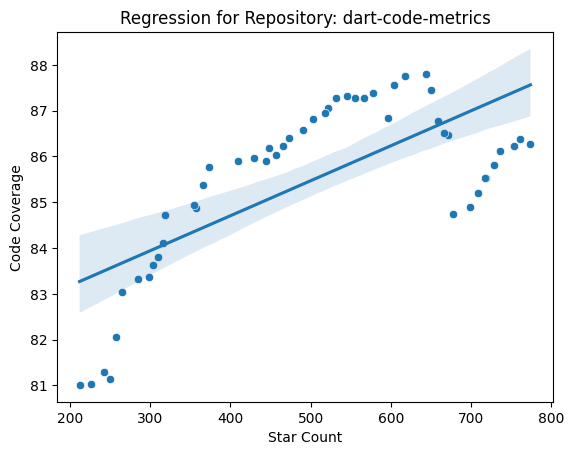

Repository: dart-petitparser
Coefficient: 0.008301147273853825
P-value: 3.914653551343973e-15
R-squared: 0.7270076820119351
Correlation Coefficient: 0.8526474547032533
RMSE: 0.18019522136919439


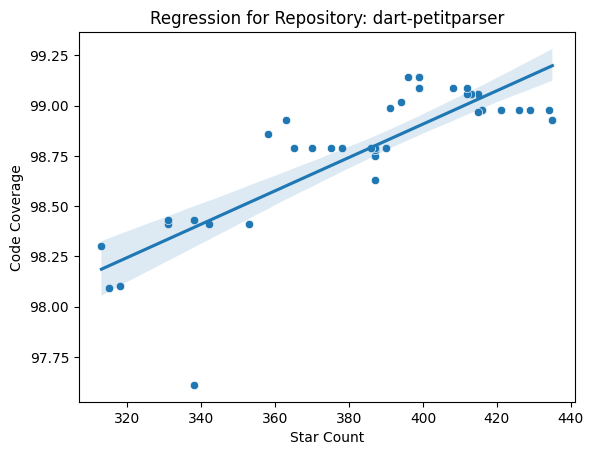

Repository: dartdoc
Coefficient: 0.10686118337412198
P-value: 0.00021170078520430435
R-squared: 0.2508701558525429
Correlation Coefficient: 0.5008693999961894
RMSE: 16.909161876807563


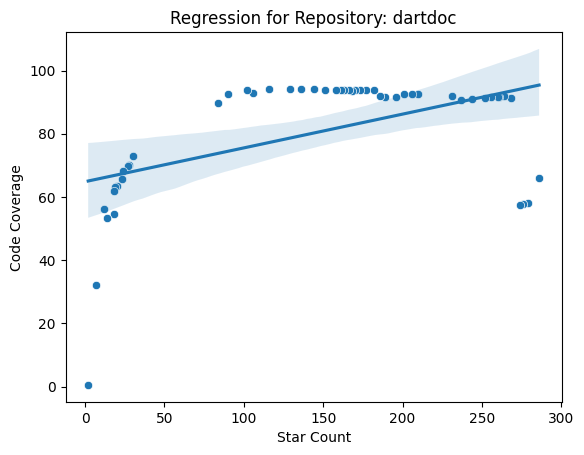

Repository: easy_localization
Coefficient: -0.060692816641111834
P-value: 3.4855354209184697e-06
R-squared: 0.3643030516723109
Correlation Coefficient: -0.6035752245348632
RMSE: 14.714700755569153


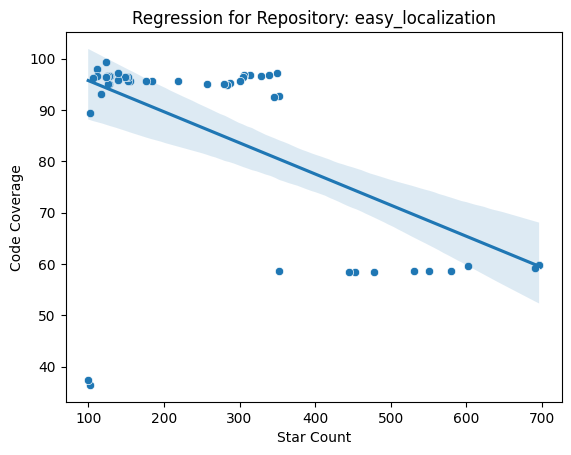

Repository: equatable
Coefficient: -0.002129814458446154
P-value: 0.061726486196753735
R-squared: 0.0770932839184133
Correlation Coefficient: -0.2776567735864074
RMSE: 0.596811148910797


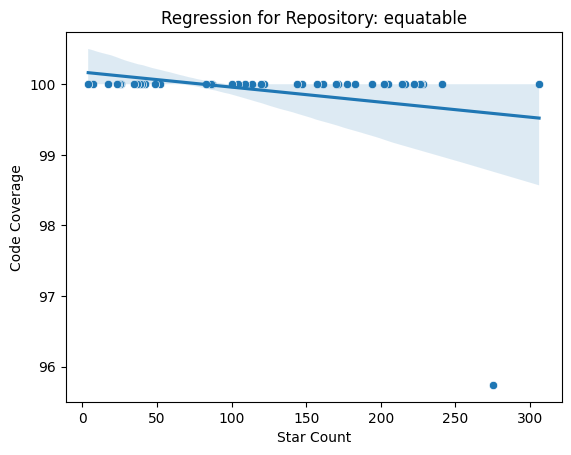

Repository: ez_tickets_app
Coefficient: 0.4073809523809522
P-value: 0.294797112791563
R-squared: 0.08397458710574612
Correlation Coefficient: 0.28978369019968364
RMSE: 7.048108729770466


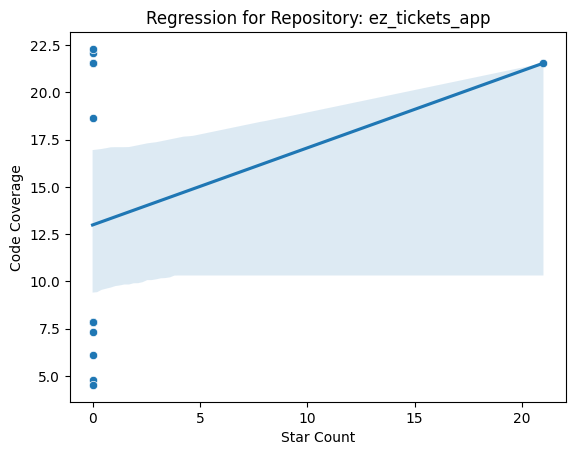

Repository: fancy_on_boarding
Coefficient: -0.01422690997339847
P-value: 0.005408483387193169
R-squared: 0.6407474623502323
Correlation Coefficient: -0.8004670276471305
RMSE: 0.44105498647758967


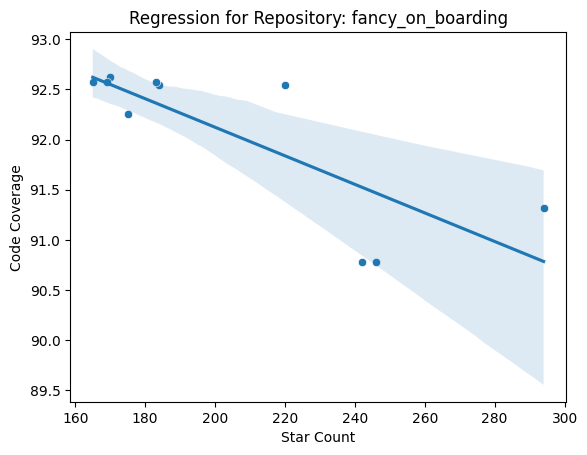

Repository: ffigen
Coefficient: 0.02425142884647684
P-value: 0.2407807889619786
R-squared: 0.028550930009641373
Correlation Coefficient: 0.1689702045025734
RMSE: 13.485037494302842


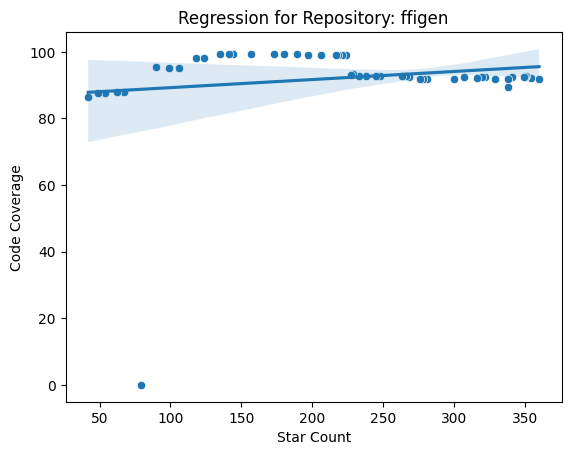

Repository: fine.sh-cli
Coefficient: 2.1163626406917047e-16
P-value: 0.7445907208826579
R-squared: -inf
Correlation Coefficient: nan
RMSE: 4.14314051144892e-14


/Users/rajkunamaneni/Desktop/ECS 260/Code-Coverage-Trends/.venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/rajkunamaneni/Desktop/ECS 260/Code-Coverage-Trends/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/rajkunamaneni/Desktop/ECS 260/Code-Coverage-Trends/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


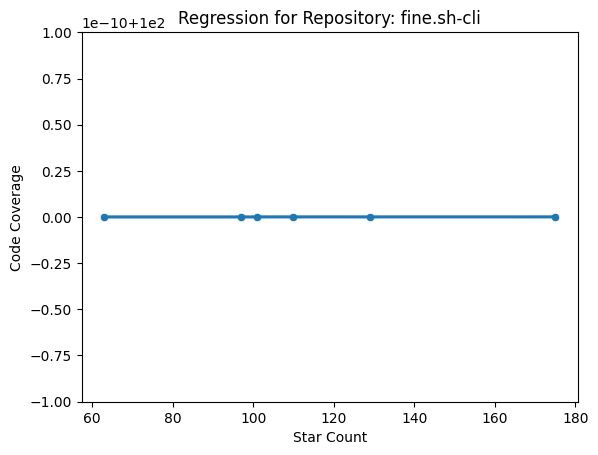

Repository: flex_color_scheme
Coefficient: 0.004123485103445132
P-value: 0.16255237058602628
R-squared: 0.04022425090731441
Correlation Coefficient: 0.20055984370584973
RMSE: 3.418343159819317


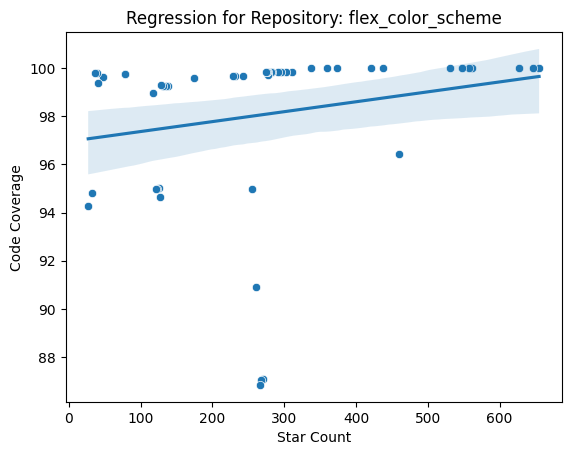

Repository: floor
Coefficient: 0.017214290363030918
P-value: 2.5792830232867478e-15
R-squared: 0.7316784619346183
Correlation Coefficient: 0.8553820561214842
RMSE: 2.244686539079685


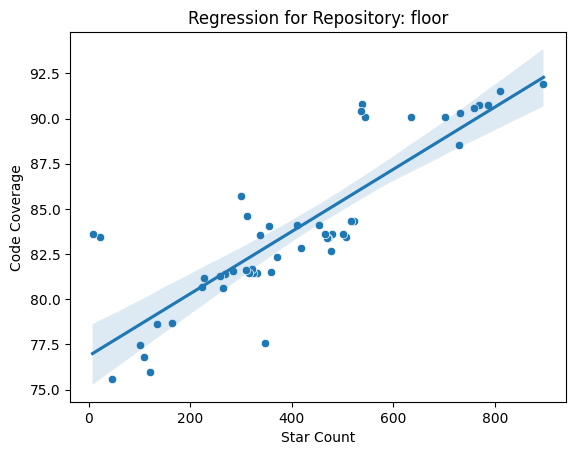

Repository: flutter
Coefficient: 0.013875005475701693
P-value: 2.2045641795968366e-06
R-squared: 0.3759509171807308
Correlation Coefficient: 0.6131483647378753
RMSE: 1.8296126462307407


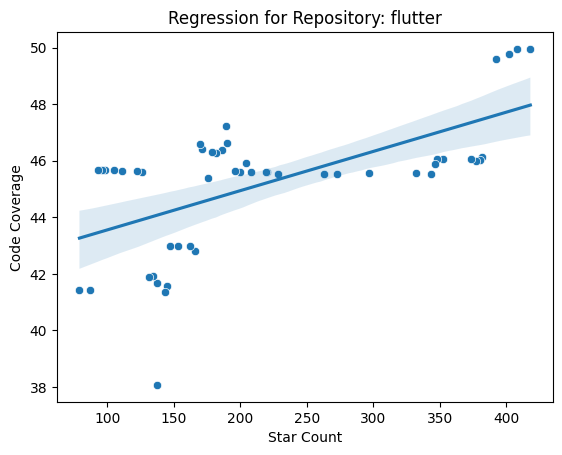

Repository: flutter-crypto-app
Coefficient: 1.2663481374630692e-16
P-value: 0.7340155610061405
R-squared: -inf
Correlation Coefficient: nan
RMSE: 4.6048432255985435e-14


/Users/rajkunamaneni/Desktop/ECS 260/Code-Coverage-Trends/.venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/rajkunamaneni/Desktop/ECS 260/Code-Coverage-Trends/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/rajkunamaneni/Desktop/ECS 260/Code-Coverage-Trends/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


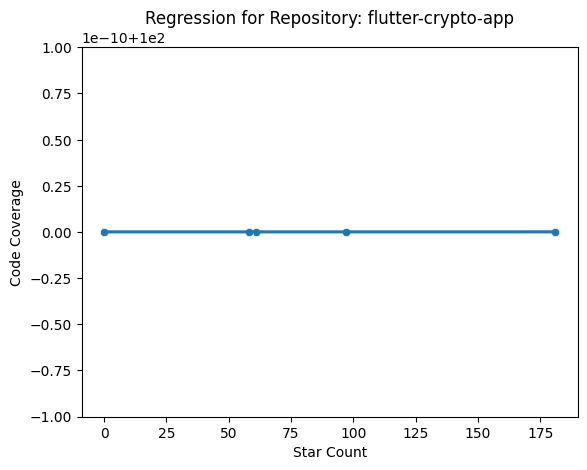

Repository: flutter_cache_manager
Coefficient: -0.006193883901601382
P-value: 0.028238845155468945
R-squared: 0.09635679149689236
Correlation Coefficient: -0.31041390351737125
RMSE: 2.2998111769849445


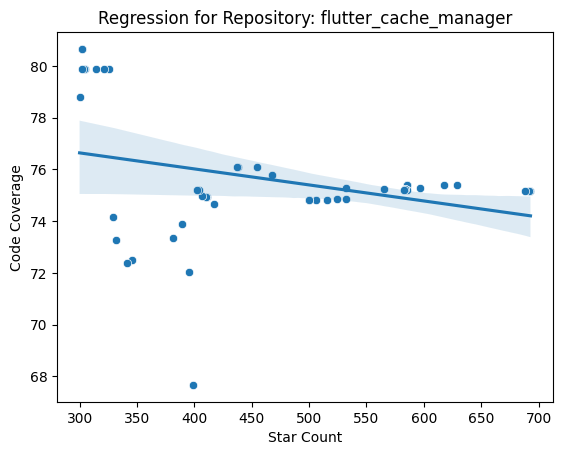

Repository: flutter_data
Coefficient: 0.009325289043798363
P-value: 0.01010961788951931
R-squared: 0.12998821073159206
Correlation Coefficient: 0.36053877840198045
RMSE: 1.5416356482454272


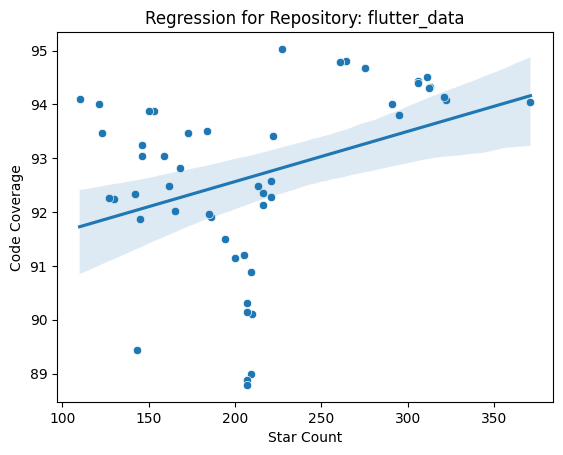

Repository: flutter_inapp_purchase
Coefficient: 0.026037804116095985
P-value: 0.4785817820911764
R-squared: 0.010514039005314446
Correlation Coefficient: 0.10253798810837994
RMSE: 6.760805031486547


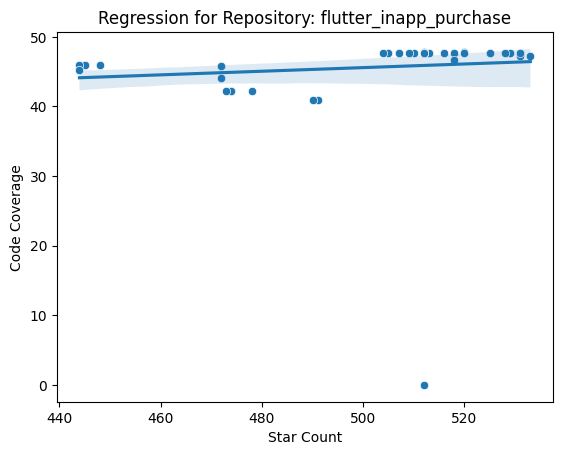

Repository: flutter_keyboard_visibility
Coefficient: 0.042083501161420955
P-value: 0.001158242928117112
R-squared: 0.3741382755802476
Correlation Coefficient: 0.6116684359849277
RMSE: 3.064491940204344


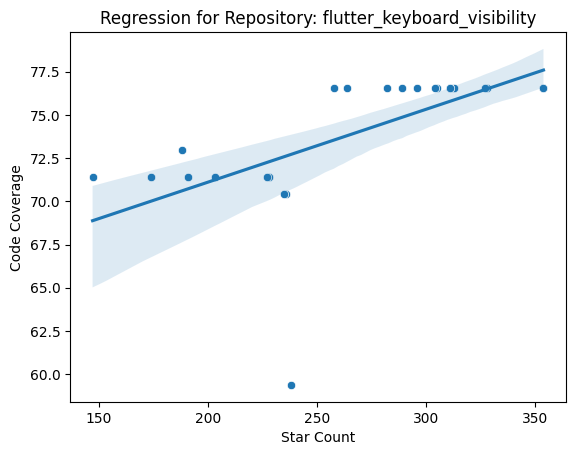

Repository: flutter_offline
Coefficient: 0.006892116026422307
P-value: 0.24547935440992133
R-squared: 0.18668861857960406
Correlation Coefficient: 0.43207478354979684
RMSE: 4.497879700857235


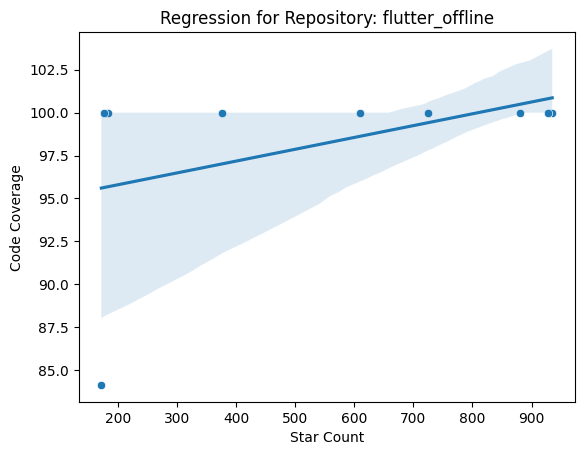

Repository: flutter_portal
Coefficient: -0.004141017854974237
P-value: 0.4737251054788124
R-squared: 0.032552691684869295
Correlation Coefficient: -0.18042364502711847
RMSE: 0.5089192299464459


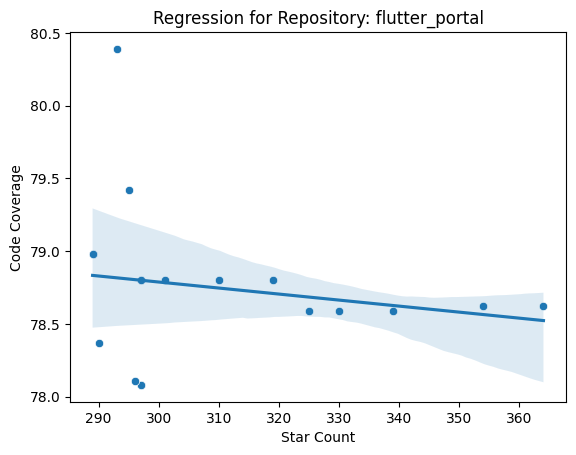

Repository: flutter_typeahead
Coefficient: 0.0375039851052179
P-value: 0.000250160114229296
R-squared: 0.8292637129952811
Correlation Coefficient: 0.910639178267266
RMSE: 0.08583265695859585


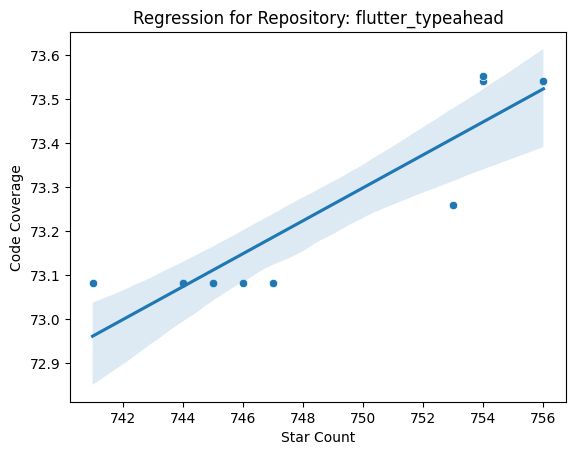

Repository: flutter_widget_from_html
Coefficient: -0.005947192225241775
P-value: 0.596445562399274
R-squared: 0.0058852085648466446
Correlation Coefficient: -0.07671511301462418
RMSE: 13.779676060225386


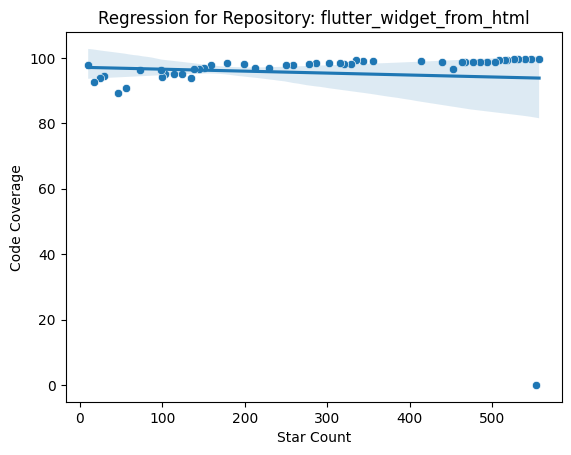

Repository: functional_widget
Coefficient: -0.12952033071829325
P-value: 0.055686772644146294
R-squared: 0.21017809024386325
Correlation Coefficient: -0.4584518407028846
RMSE: 20.20281218561741


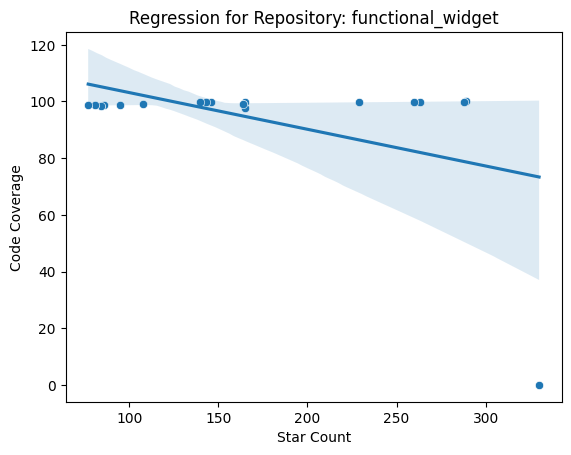

Repository: generator-reveal
Coefficient: 0.0010774630118948034
P-value: 0.40875049391253004
R-squared: 0.014263316146506333
Correlation Coefficient: 0.11942912603928241
RMSE: 0.8154684863880495


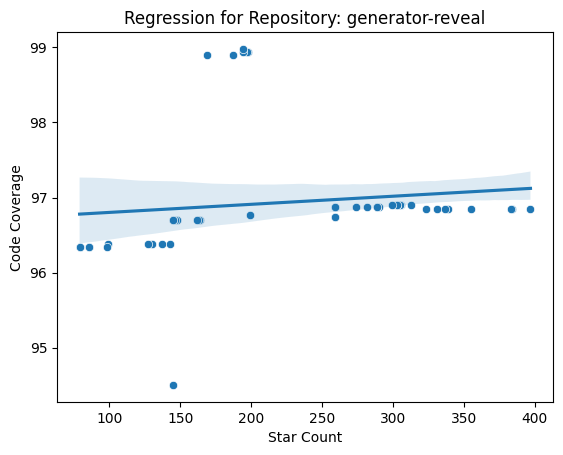

Repository: giffy_dialog
Coefficient: -0.05513158802722129
P-value: 1.4097502206953684e-13
R-squared: 0.8820169603590112
Correlation Coefficient: -0.9391575801530915
RMSE: 3.414078388344456


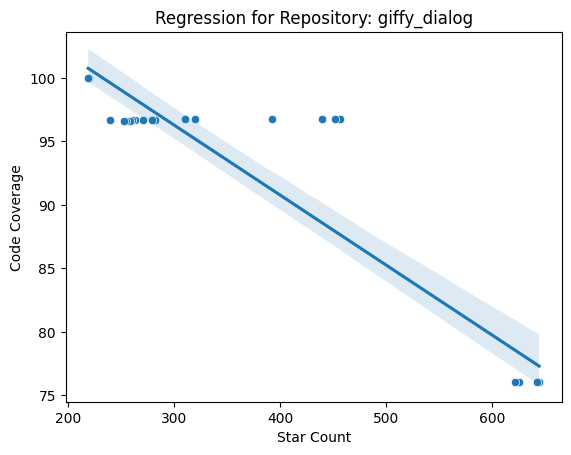

Repository: go_router
Coefficient: -0.03720697212116057
P-value: 0.034745026439960365
R-squared: 0.19530069580355747
Correlation Coefficient: -0.4419283831160401
RMSE: 2.0061618748264283


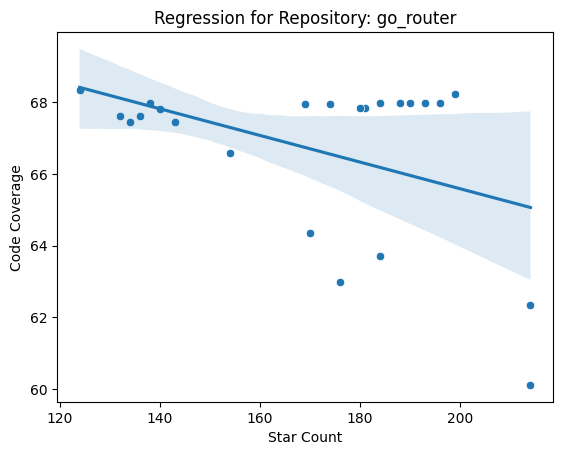

Repository: gulp-tap
Coefficient: 0.07018012899776037
P-value: 0.01265444543186016
R-squared: 0.39111925737598296
Correlation Coefficient: 0.6253952809031925
RMSE: 1.1532771787643035


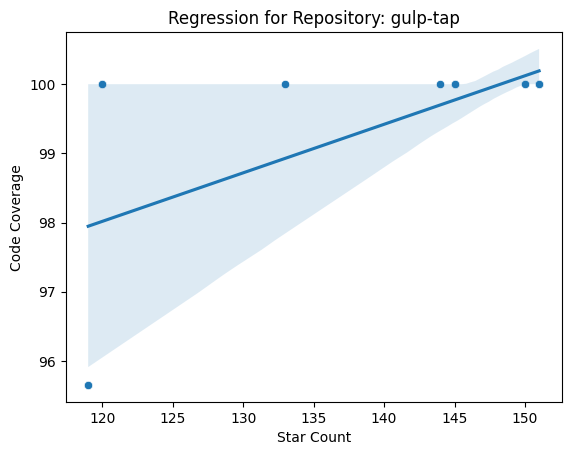

Repository: home_widget
Coefficient: -0.00039836098332650394
P-value: 0.4428844471829413
R-squared: 0.016000246180094213
Correlation Coefficient: -0.1264920795152689
RMSE: 0.4296108577894135


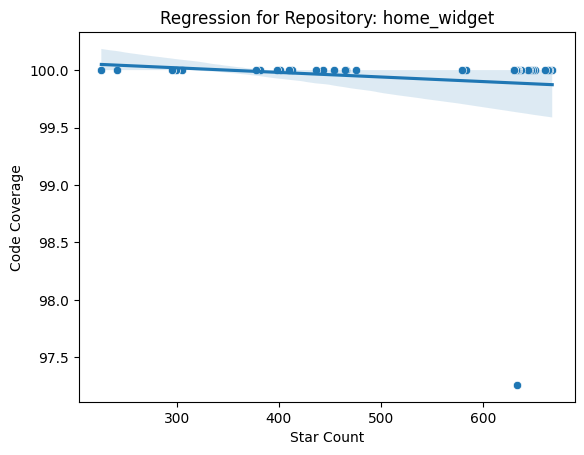

Repository: hubot-chatwork
Coefficient: 0.20086589956473605
P-value: 0.24868469259741352
R-squared: 0.13046237405879313
Correlation Coefficient: 0.3611957558704048
RMSE: 6.749582812926207


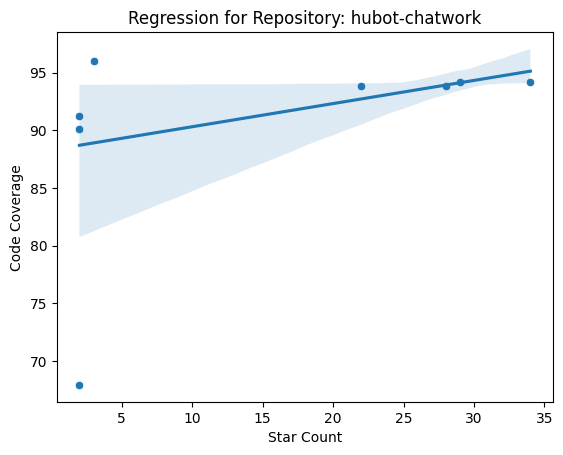

Repository: ims-lti
Coefficient: 0.040691900938929125
P-value: 0.1791608676162331
R-squared: 0.06134069221406524
Correlation Coefficient: 0.2476705315819088
RMSE: 4.53043216209512


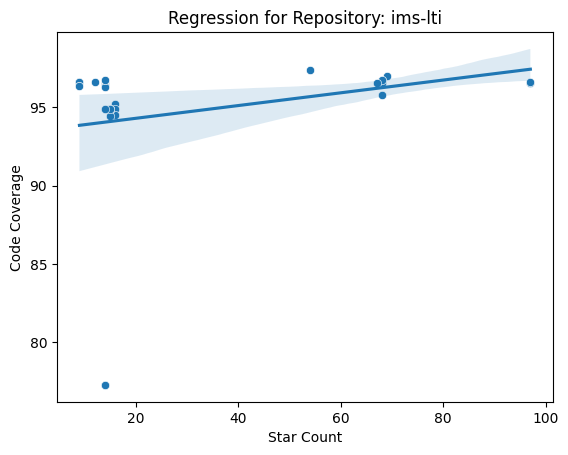

Repository: infinite_scroll_pagination
Coefficient: 0.0016464364588860546
P-value: 0.5107545031027647
R-squared: 0.15583508282098169
Correlation Coefficient: 0.39475952530746744
RMSE: 0.5857378955638474


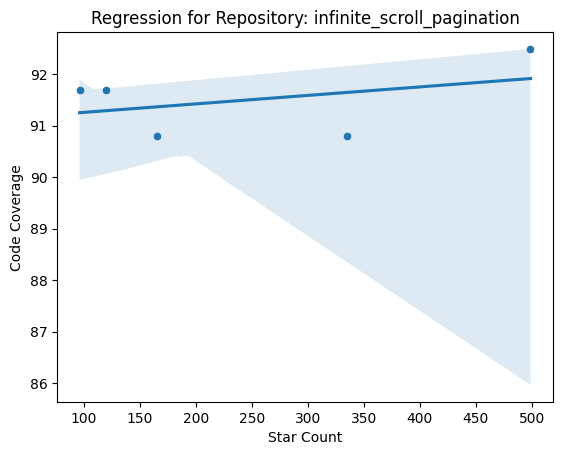

Repository: jadelet
Coefficient: 1.7763568394002505e-15
P-value: 0.9628365003689422
R-squared: -inf
Correlation Coefficient: nan
RMSE: 4.879519995424004e-13


/Users/rajkunamaneni/Desktop/ECS 260/Code-Coverage-Trends/.venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/rajkunamaneni/Desktop/ECS 260/Code-Coverage-Trends/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/rajkunamaneni/Desktop/ECS 260/Code-Coverage-Trends/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


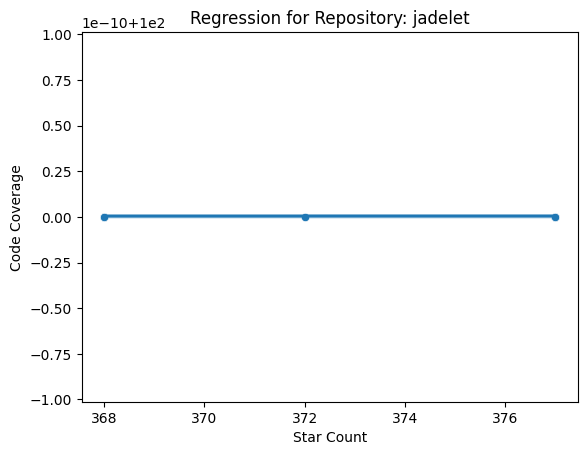

Repository: jaspr
Coefficient: -0.004066547786155223
P-value: 0.20287942809345674
R-squared: 0.03355842617395777
Correlation Coefficient: -0.18318959079041122
RMSE: 3.6963994185171742


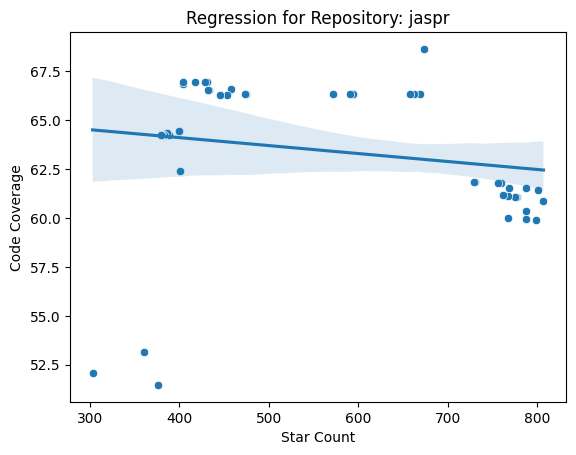

Repository: jiffy
Coefficient: 0.010789703740781852
P-value: 0.017424025170409144
R-squared: 0.13331937030303376
Correlation Coefficient: 0.36512925150285436
RMSE: 2.381120723264092


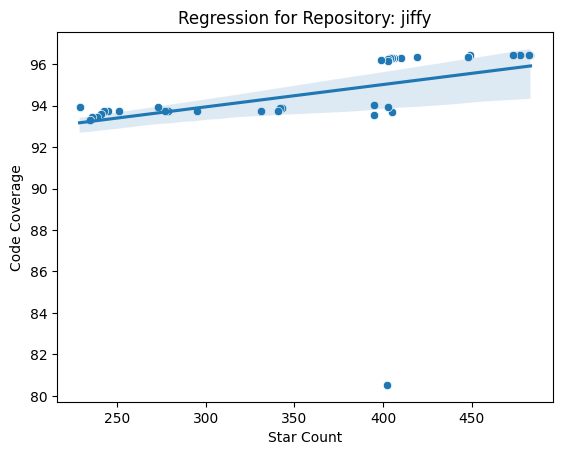

Repository: kd
Coefficient: 2.6601208152657048
P-value: 0.00035407551633125507
R-squared: 0.44714525341487277
Correlation Coefficient: 0.6686892053973004
RMSE: 6.417059814463072


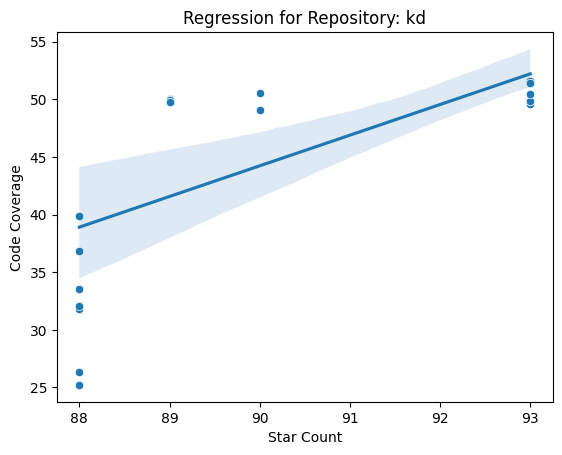

Repository: kt.dart
Coefficient: 0.012903532303382698
P-value: 0.36696396849737956
R-squared: 0.01698799055358935
Correlation Coefficient: 0.13033798584291936
RMSE: 16.250008936697636


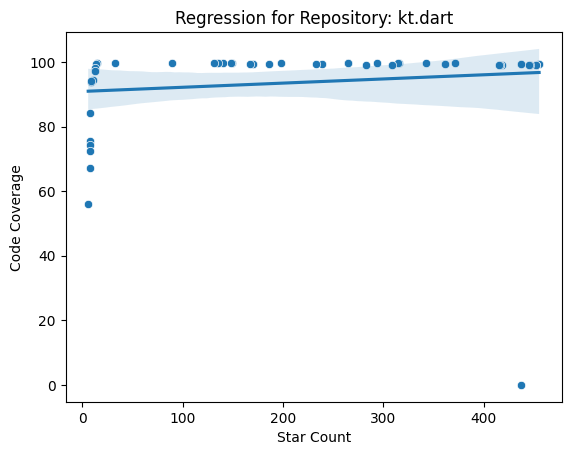

Repository: linter
Coefficient: 0.0018783476131717218
P-value: 0.14234547598364208
R-squared: 0.04429861273319813
Correlation Coefficient: 0.21047235622095004
RMSE: 1.8992381711905786


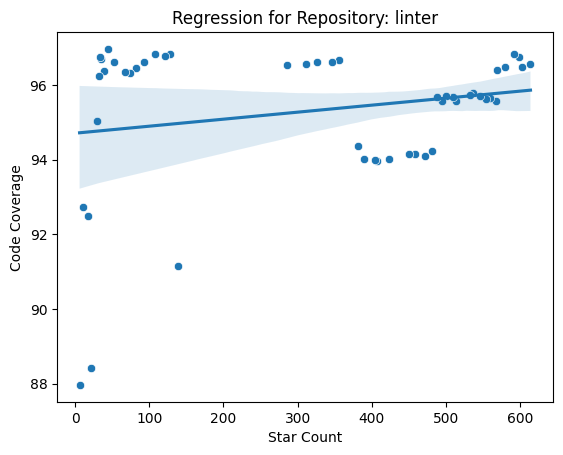

Repository: lotti
Coefficient: -0.014612447499045427
P-value: 0.23993378513686617
R-squared: 0.02865247844780383
Correlation Coefficient: -0.1692704299273914
RMSE: 3.0714052323299277


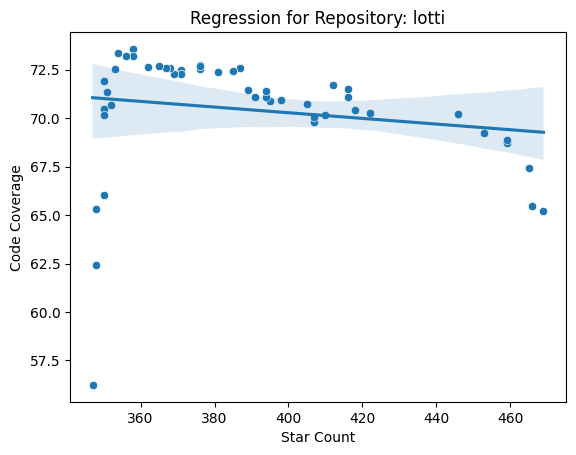

Repository: markdown
Coefficient: 0.012838534329452856
P-value: 1.1120918228642017e-07
R-squared: 0.4471551019823592
Correlation Coefficient: 0.6686965694411484
RMSE: 0.43997310093762476


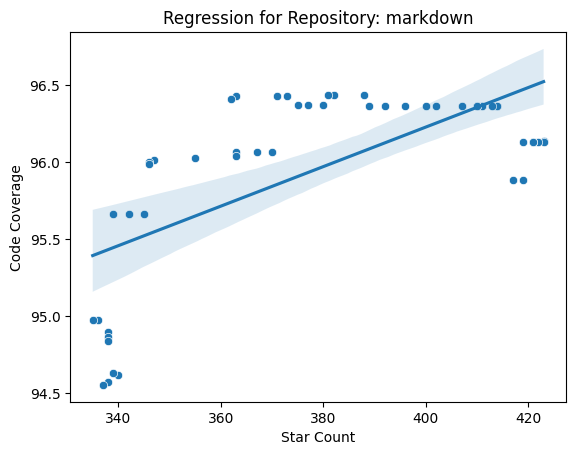

Repository: mqtt_client
Coefficient: 0.004110466080610516
P-value: 0.08397558137656237
R-squared: 0.2953995198053586
Correlation Coefficient: 0.5435066879122752
RMSE: 0.1417057915933586


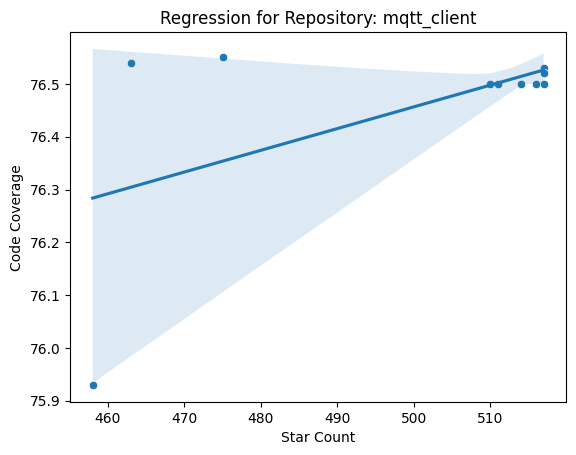

Repository: node-osc-min
Coefficient: -0.008337988377022439
P-value: 2.1129239415409783e-05
R-squared: 0.8779640473885845
Correlation Coefficient: -0.9369973571940154
RMSE: 0.040472213952071734


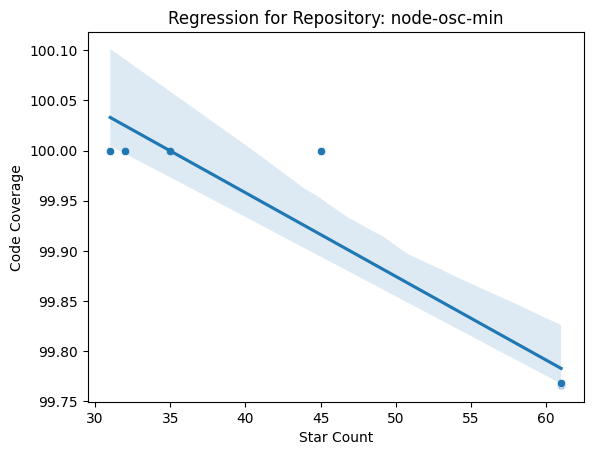

Repository: over_react
Coefficient: -0.021836935546995145
P-value: 0.01038491558785282
R-squared: 0.12911195142658427
Correlation Coefficient: -0.3593215153961482
RMSE: 3.53628688809725


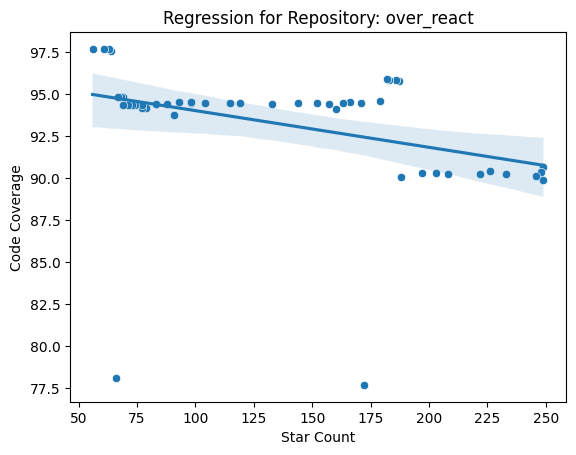

Repository: overlay_support
Coefficient: -0.0035377793187072407
P-value: 0.6997273765481791
R-squared: 0.0031937407455235878
Correlation Coefficient: -0.05651319089844168
RMSE: 6.189549907393935


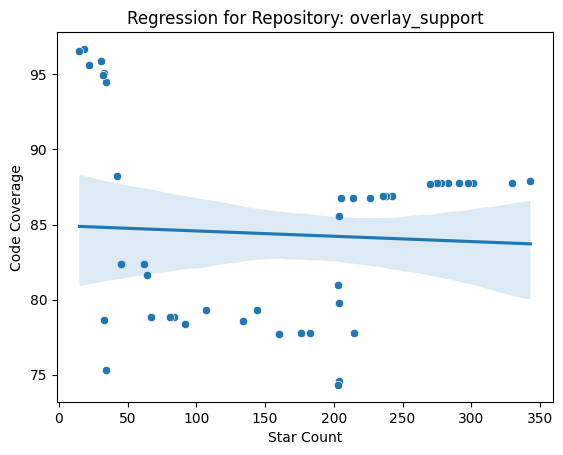

Repository: pathplanner
Coefficient: 0.12574345163498016
P-value: 0.011758373392189334
R-squared: 0.1250572375605432
Correlation Coefficient: 0.35363432746347334
RMSE: 11.156151818162028


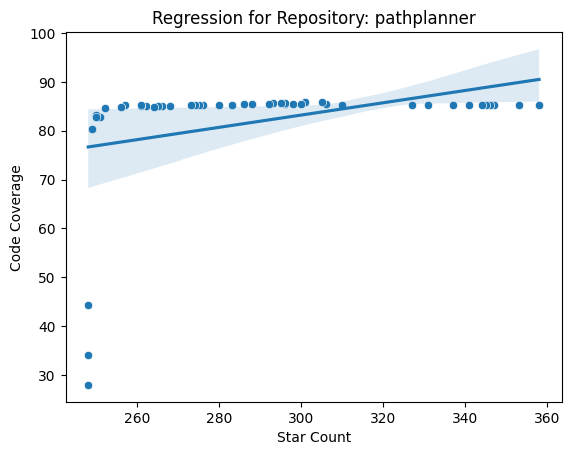

Repository: patrol
Coefficient: -0.1049000936621914
P-value: 0.5531481703965769
R-squared: 0.013694850607940734
Correlation Coefficient: -0.11702499992711225
RMSE: 9.521433320706617


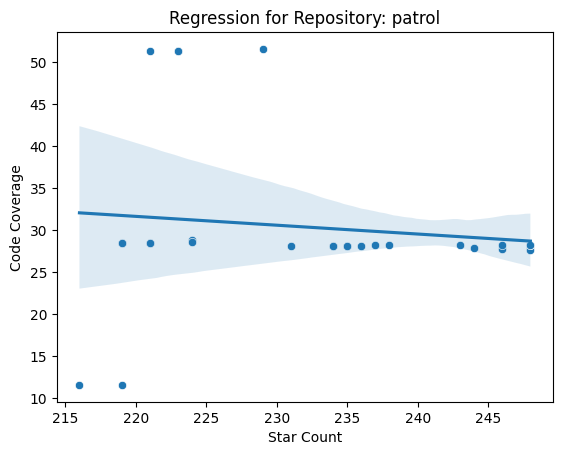

Repository: pioneer
Coefficient: -0.009264729502416339
P-value: 0.3657420611397002
R-squared: 0.017074084738725737
Correlation Coefficient: -0.1306678412568508
RMSE: 9.369186052719135


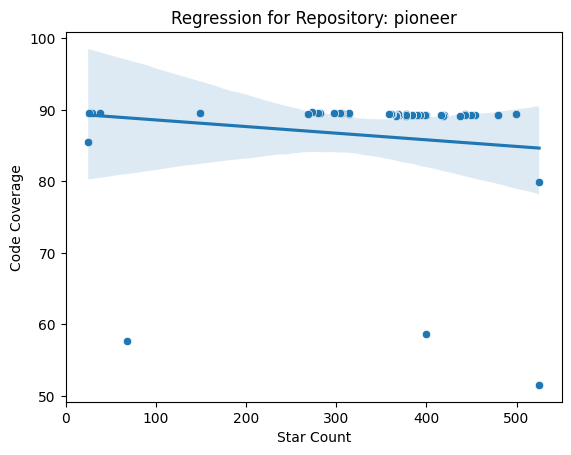

Repository: pluto_grid
Coefficient: 0.002182969855811267
P-value: 0.550381197609567
R-squared: 0.007479522013966844
Correlation Coefficient: 0.08648422985704937
RMSE: 3.972330898964729


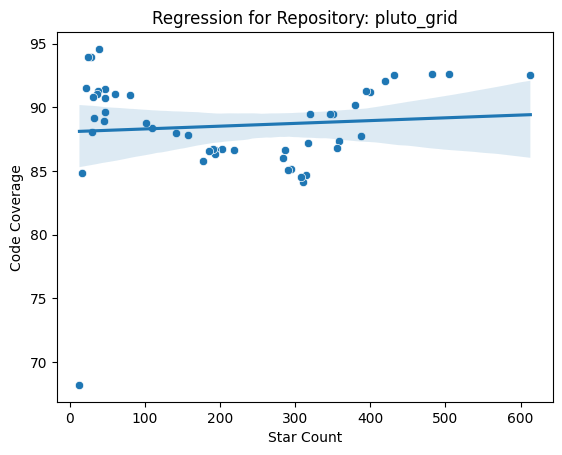

Repository: polvo
Coefficient: 0.014032564601041835
P-value: 0.39421541866729326
R-squared: 0.02604574978976537
Correlation Coefficient: 0.161386956690328
RMSE: 0.9360066509478483


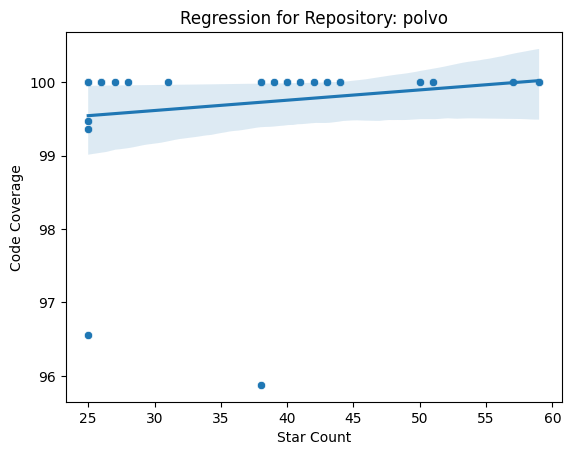

Repository: quiver-dart
Coefficient: -0.011238383765621548
P-value: 0.3867568601833362
R-squared: 0.015646040226730107
Correlation Coefficient: -0.12508413259374662
RMSE: 19.38043475672043


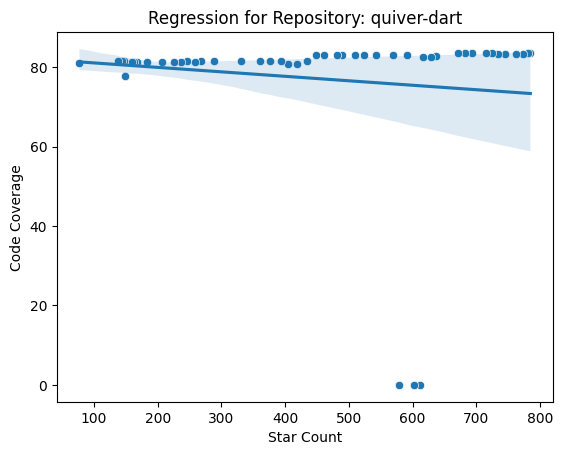

Repository: reactive_forms
Coefficient: 0.002986163851100711
P-value: 5.4503340251369746e-05
R-squared: 0.29015819681360044
Correlation Coefficient: 0.5386633427416421
RMSE: 0.5896931269678192


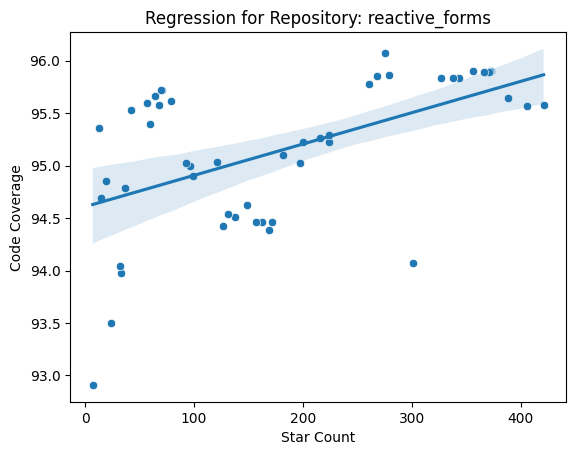

Repository: realm-dart
Coefficient: -0.01607866791770588
P-value: 1.79930891443867e-10
R-squared: 0.5749696405974516
Correlation Coefficient: -0.7582675257436859
RMSE: 1.3513348158410727


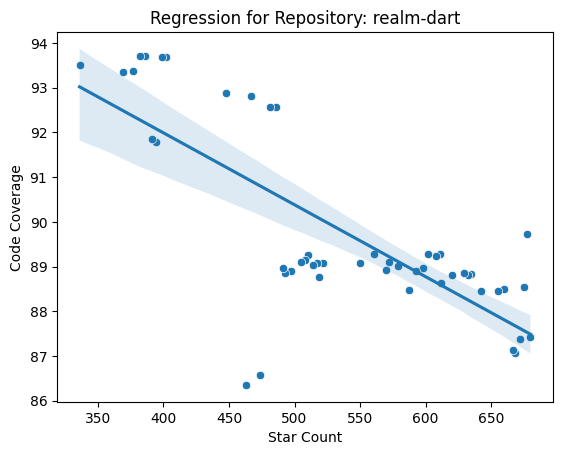

Repository: redux.dart
Coefficient: -0.017198483804273048
P-value: 0.4527913667772312
R-squared: 0.08278773259820771
Correlation Coefficient: -0.2877285745250341
RMSE: 0.9691550945879617


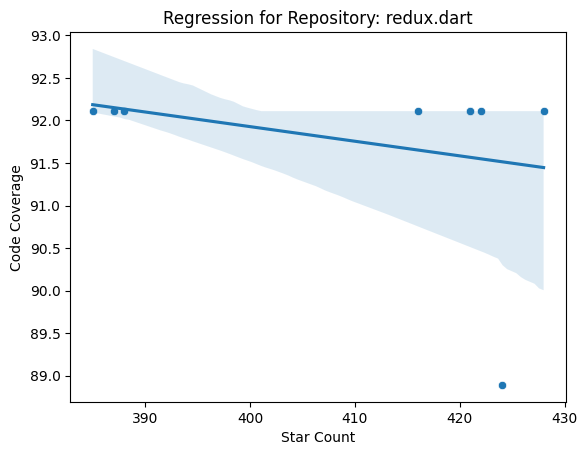

Repository: rick-and-morty-info
Coefficient: 0.005068493005723887
P-value: 0.0027338598316450032
R-squared: 0.6093157524671322
Correlation Coefficient: 0.780586800085123
RMSE: 0.3287776370956488


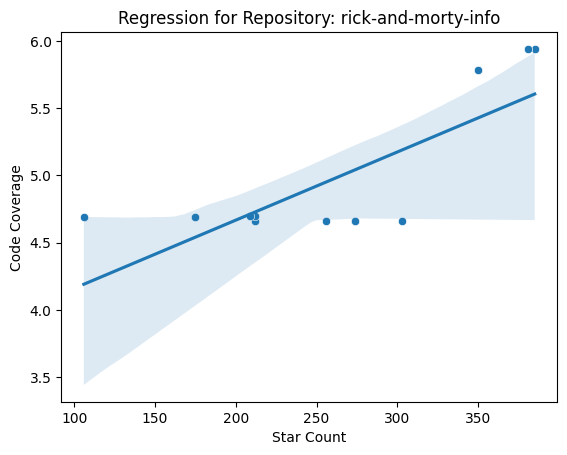

Repository: roots-contentful
Coefficient: 0.03134943450575187
P-value: 0.24231701798235933
R-squared: 0.02836782669269211
Correlation Coefficient: 0.1684275116858643
RMSE: 3.865071679756358


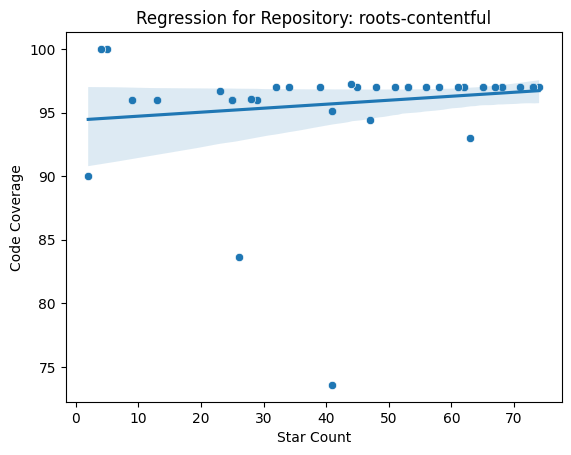

Repository: rsmq-worker
Coefficient: 0.06867428013115624
P-value: 0.8466464442694565
R-squared: 0.005720943423149993
Correlation Coefficient: 0.07563691838744975
RMSE: 18.96723147005371


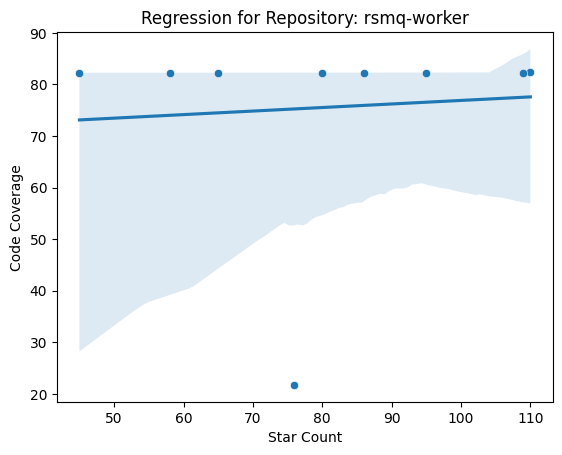

Repository: samples
Coefficient: 4.440892098500626e-16
P-value: 0.428942640426048
R-squared: -24.928571428571427
Correlation Coefficient: 1.2649598574466943e-15
RMSE: 7.236182211654854e-14


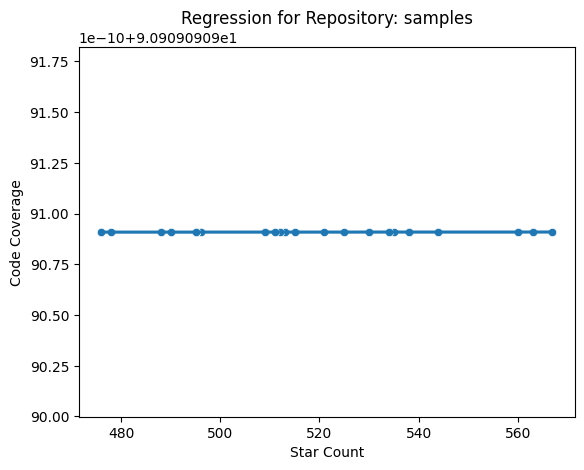

Repository: scaleApp
Coefficient: 0.0024500168585462334
P-value: 6.01983002850008e-07
R-squared: 0.757786142715225
Correlation Coefficient: 0.8705091284502563
RMSE: 0.03755914574720018


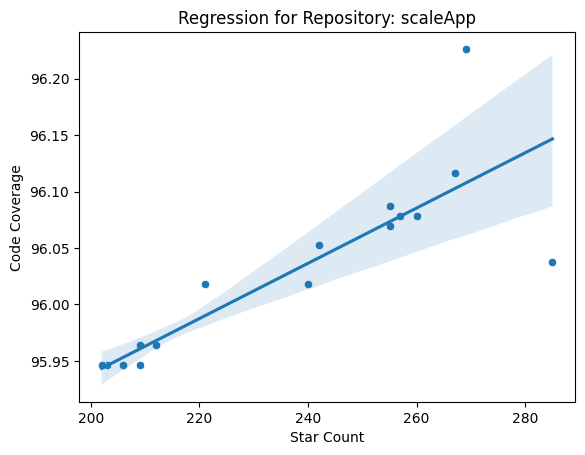

Repository: scientist
Coefficient: 1.1102230246251565e-16
P-value: 0.9188905189529654
R-squared: -inf
Correlation Coefficient: nan
RMSE: 5.0242958677880804e-14


/Users/rajkunamaneni/Desktop/ECS 260/Code-Coverage-Trends/.venv/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/Users/rajkunamaneni/Desktop/ECS 260/Code-Coverage-Trends/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/rajkunamaneni/Desktop/ECS 260/Code-Coverage-Trends/.venv/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


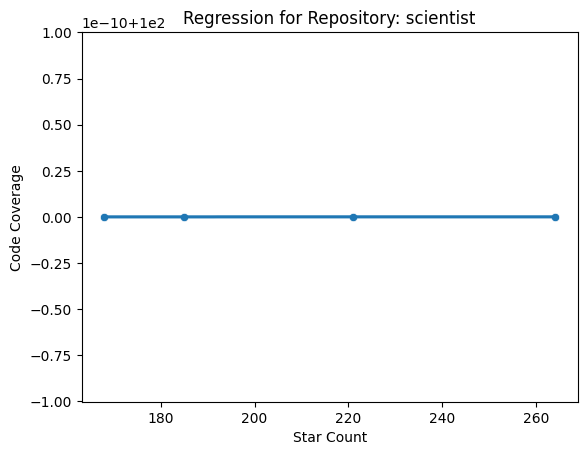

Repository: scoped_model
Coefficient: -0.03745495699446441
P-value: 0.05843937354221577
R-squared: 0.15334808076569617
Correlation Coefficient: -0.3915968344684314
RMSE: 22.85949431218808


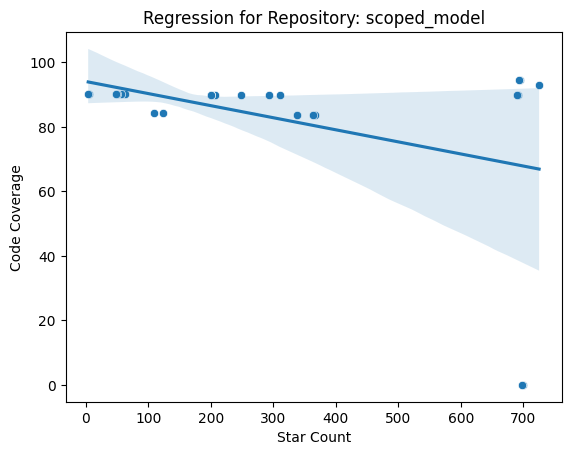

Repository: sembast.dart
Coefficient: 0.028539183608480918
P-value: 2.5022611931619677e-05
R-squared: 0.3118930274443763
Correlation Coefficient: 0.5584738377438789
RMSE: 2.831502773458317


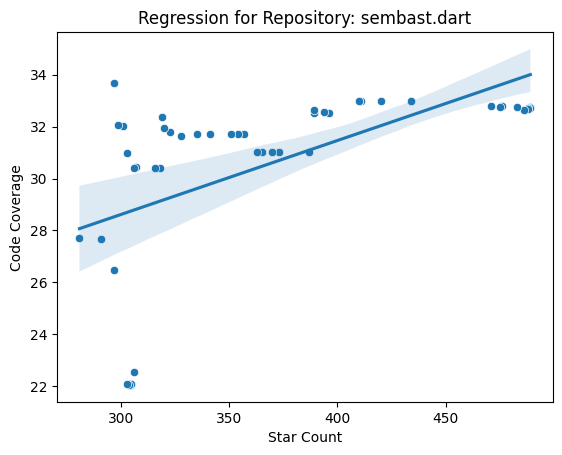

Repository: sentry-dart
Coefficient: -0.06810016462884516
P-value: 0.12374448234815702
R-squared: 0.04865122384619436
Correlation Coefficient: -0.22057022429646836
RMSE: 14.003712692866184


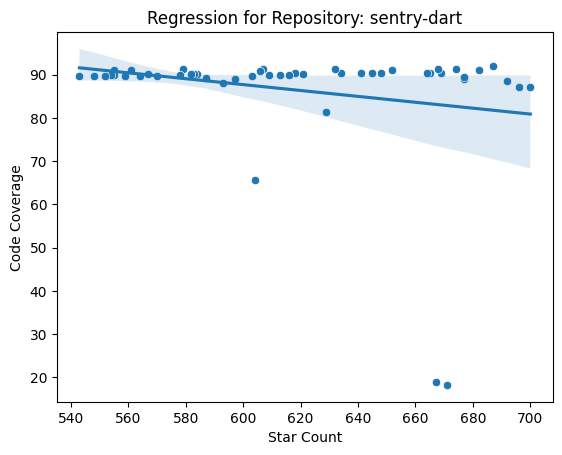

Repository: settings-view
Coefficient: 0.07809025812021175
P-value: 0.7376516393908611
R-squared: 0.024474515154928267
Correlation Coefficient: 0.15644332889237714
RMSE: 14.760872228790534


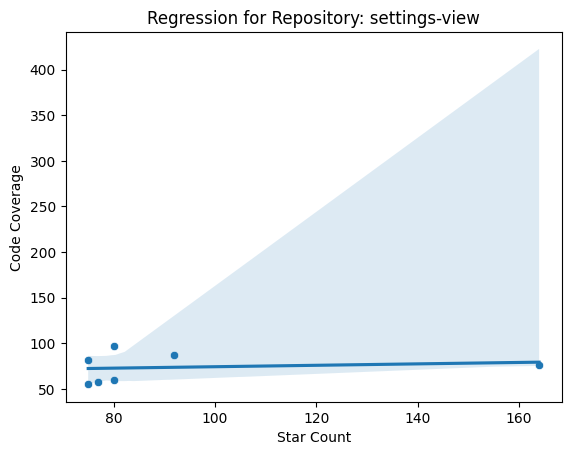

Repository: ship
Coefficient: 0.0272699264458183
P-value: 0.18932453694652843
R-squared: 0.16553330909492625
Correlation Coefficient: 0.4068578487567018
RMSE: 0.8295721855339228


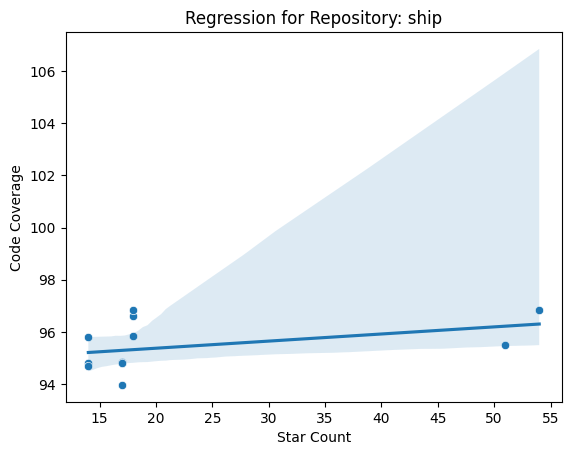

Repository: simple-uploader
Coefficient: 0.02014886455221994
P-value: 0.18884542285750217
R-squared: 0.9145569620253381
Correlation Coefficient: 0.9563247157871202
RMSE: 0.02580422540306411


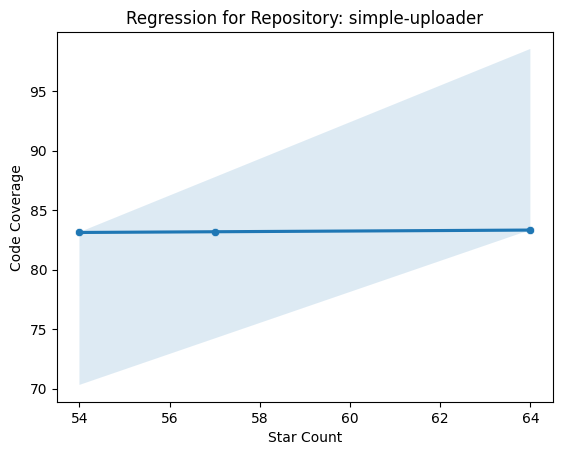

Repository: smooth-app
Coefficient: 0.002870665638001667
P-value: 0.13404762960390537
R-squared: 0.0461591130452369
Correlation Coefficient: 0.21484671988475165
RMSE: 1.9804685624406253


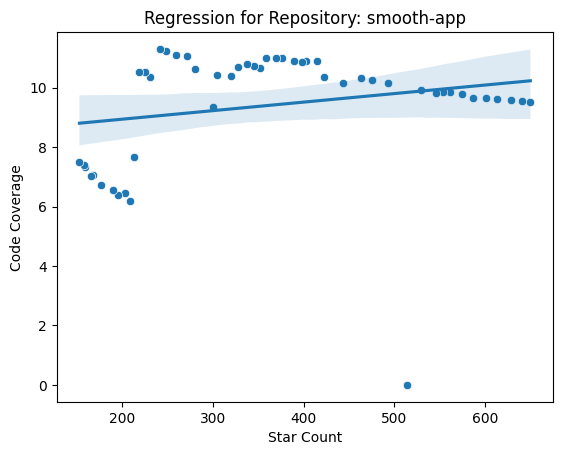

Repository: spacex-go
Coefficient: 0.10520154288695739
P-value: 9.303327677324672e-05
R-squared: 0.39368068303211246
Correlation Coefficient: 0.6274397843874046
RMSE: 4.762300717162805


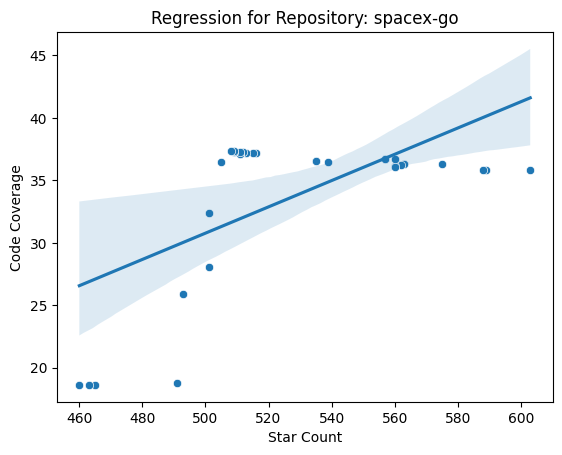

Repository: spectacular
Coefficient: 0.03189223460420349
P-value: 0.013962685997091676
R-squared: 0.12184419172135252
Correlation Coefficient: 0.34906187377218983
RMSE: 2.3256076520690434


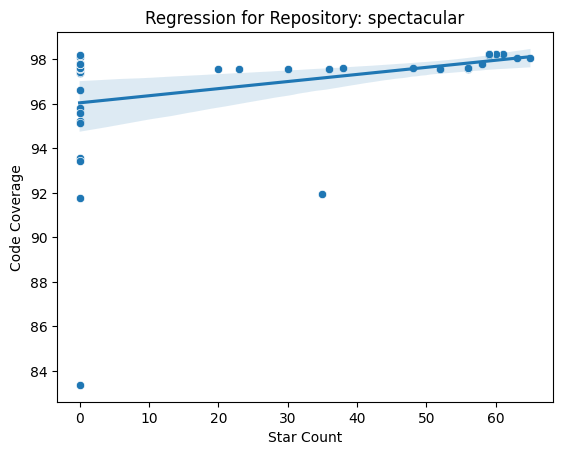

Repository: states_rebuilder
Coefficient: -0.013938113899606369
P-value: 0.008970992514100197
R-squared: 0.13388169674626094
Correlation Coefficient: -0.36589847874275405
RMSE: 2.4532628112646866


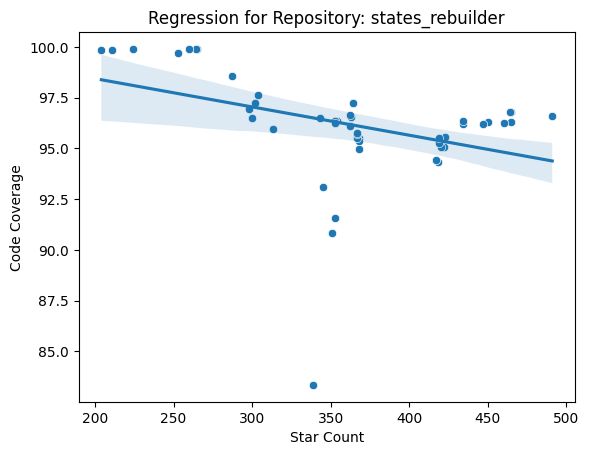

Repository: stream-chat-flutter
Coefficient: 0.05562456632739328
P-value: 1.4191099247553527e-05
R-squared: 0.3273571522569818
Correlation Coefficient: 0.5721513368480245
RMSE: 16.52854413779991


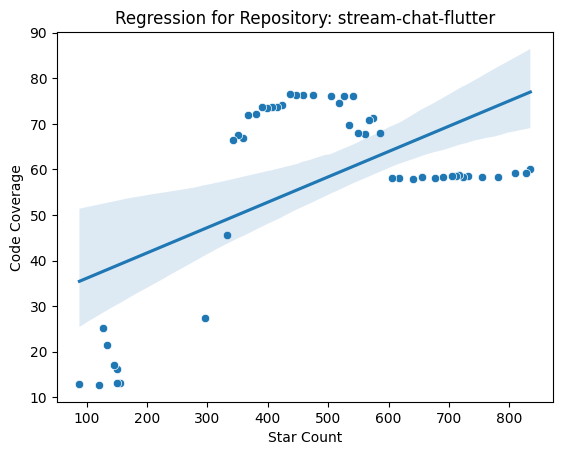

Repository: tab-ahead
Coefficient: 0.010379958731957297
P-value: 2.3249071896013752e-10
R-squared: 0.5704724333846256
Correlation Coefficient: 0.7552962553757518
RMSE: 0.19185475337855412


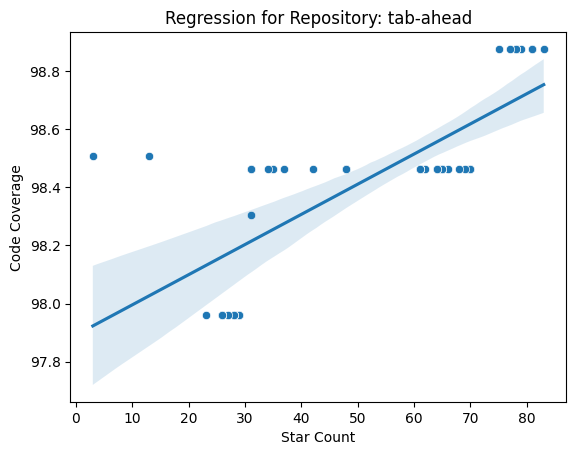

Repository: time.dart
Coefficient: 0.002987887138822788
P-value: 0.04503242472490406
R-squared: 0.1015723246634277
Correlation Coefficient: 0.3187041334269562
RMSE: 0.9380465017358421


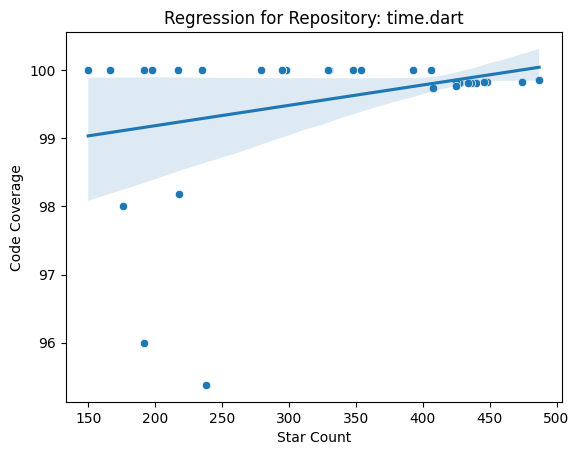

Repository: timeline_list
Coefficient: 0.0035572842675533904
P-value: 0.20842011842541308
R-squared: 0.2942144634341919
Correlation Coefficient: 0.542415397489954
RMSE: 0.5208103919400641


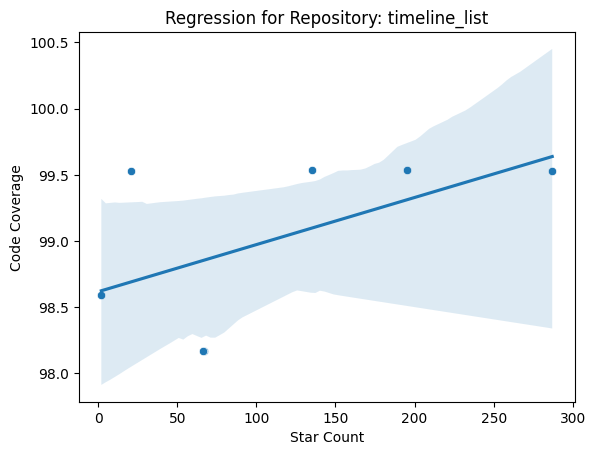

Repository: transformer_page_view
Coefficient: -0.001018287706799258
P-value: 0.7590958355626771
R-squared: 0.005680835743639978
Correlation Coefficient: -0.0753713191050718
RMSE: 1.1916147423570764


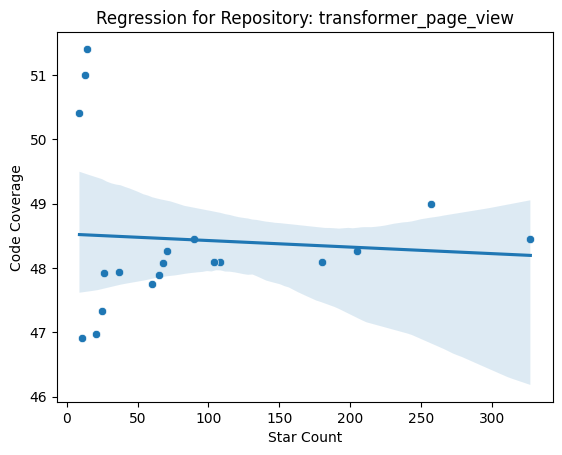

Repository: twix.js
Coefficient: -0.008624748397618356
P-value: 0.8933081114394595
R-squared: 0.0005212012388768894
Correlation Coefficient: -0.022829832213062784
RMSE: 15.868255796725947


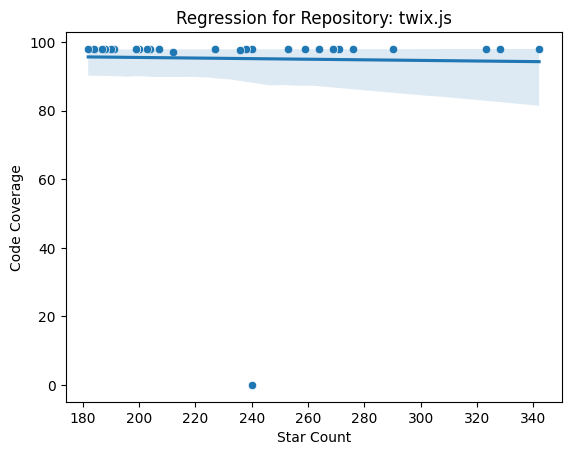

Repository: ubuntu-desktop-installer
Coefficient: -0.011822067484724332
P-value: 0.0009914418407482174
R-squared: 0.20405525996539708
Correlation Coefficient: -0.4517247612931977
RMSE: 1.474234886912857


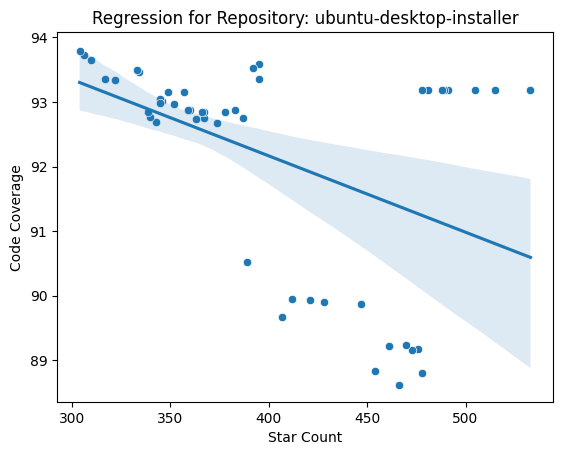

Repository: upgrader
Coefficient: 0.013370028322928785
P-value: 2.66328842949137e-08
R-squared: 0.47844044375735817
Correlation Coefficient: 0.6916938945497194
RMSE: 2.0530172137548397


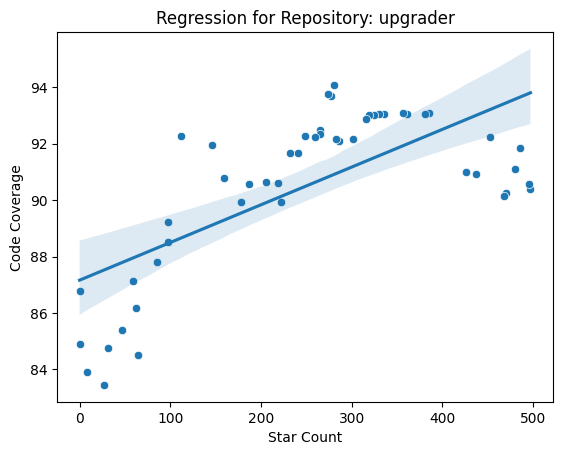

Repository: url-pattern
Coefficient: -2.7789263151996068e-05
P-value: 0.3719284898380744
R-squared: 0.26770323502896576
Correlation Coefficient: -0.5174004590539282
RMSE: 0.004192269356717535


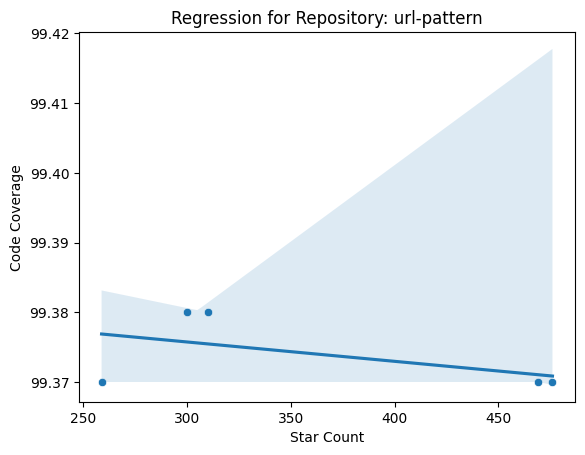

Repository: web3dart
Coefficient: 0.013163200399278603
P-value: 7.855981366796521e-08
R-squared: 0.45492341169815953
Correlation Coefficient: 0.6744801047459882
RMSE: 1.3586330438857972


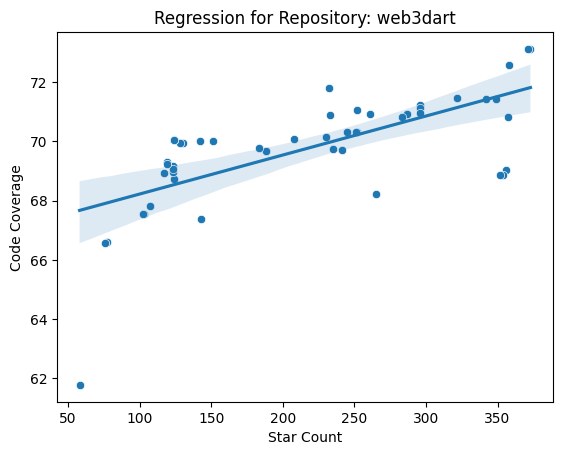

Repository: wechat_kit
Coefficient: -0.29955995866862867
P-value: 8.424307220069279e-07
R-squared: 0.8765995854309953
Correlation Coefficient: -0.936268970665479
RMSE: 7.173489528799002


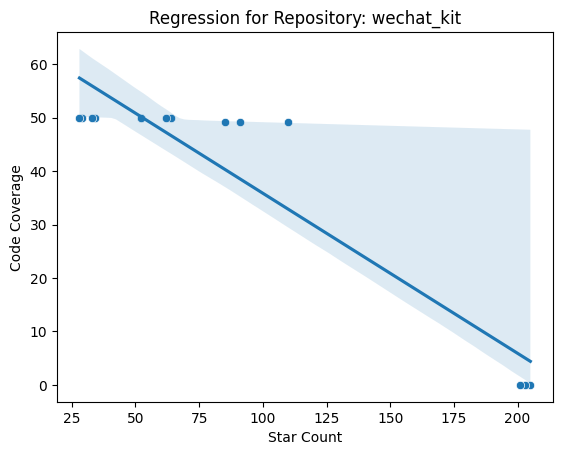

Repository: weight_tracker
Coefficient: 0.10693224097945156
P-value: 0.03340135426725192
R-squared: 0.14215996168362433
Correlation Coefficient: 0.37704106100479856
RMSE: 7.093508669528516


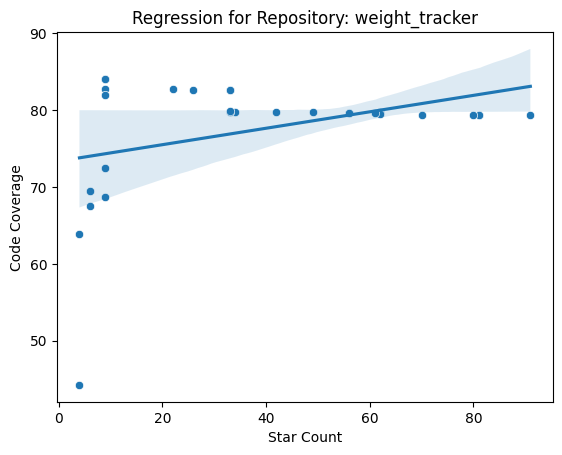

Repository: widgetbook
Coefficient: -0.12922740550322742
P-value: 0.056790798592614426
R-squared: 0.10878103700522701
Correlation Coefficient: -0.3298197037856092
RMSE: 11.910124963135281


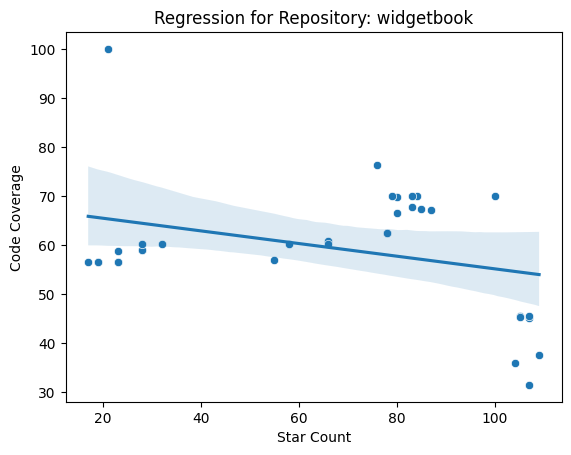

Repository: xmlbuilder-js
Coefficient: -0.031703607687777004
P-value: 5.394257262820394e-13
R-squared: 0.6653980797941494
Correlation Coefficient: -0.8157193633806599
RMSE: 4.823153310070141


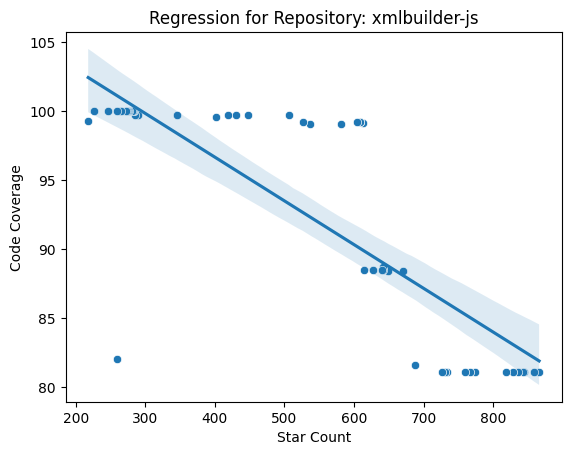

Repository: xterm.dart
Coefficient: 0.0031951225846663794
P-value: 0.4013473238772206
R-squared: 0.039426397999348106
Correlation Coefficient: 0.19856081687823185
RMSE: 0.6189309749567053


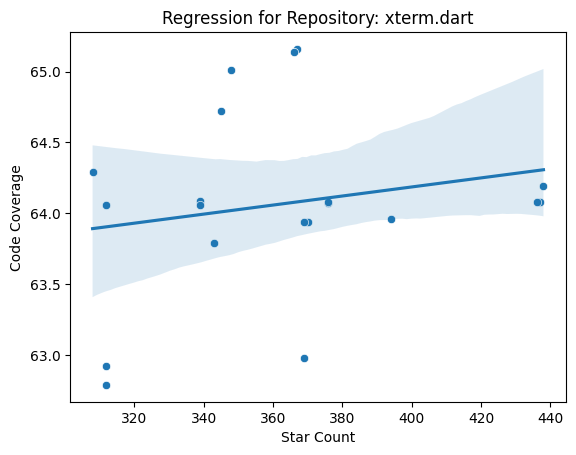

            Repository   Coefficient       P-value  R-squared  \
0        xmlbuilder-js -6.678685e-17  8.013388e-01       -inf   
1          url-pattern  1.924296e-02  8.406112e-05   0.496556   
2              pioneer -1.292824e-02  1.389243e-02   0.119605   
3     generator-reveal  2.001645e-03  2.630542e-05   0.310515   
4            scientist  5.504188e-01  3.555704e-12   0.638341   
..                 ...           ...           ...        ...   
98              ffigen -2.995600e-01  8.424307e-07   0.876600   
99   fancy_on_boarding  1.069322e-01  3.340135e-02   0.142160   
100     weight_tracker -1.292274e-01  5.679080e-02   0.108781   
101        pathplanner -3.170361e-02  5.394257e-13   0.665398   
102          OCMockito  3.195123e-03  4.013473e-01   0.039426   

     Correlation Coefficient  
0                        NaN  
1                   0.704668  
2                  -0.345839  
3                   0.557239  
4                   0.798962  
..                       ...  
98

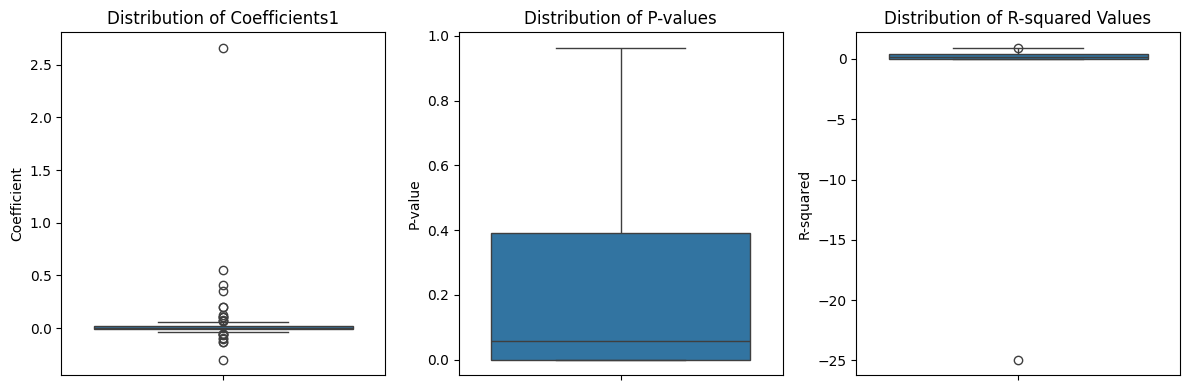

In [23]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

# Read CSV into DataFrame
# data = pd.read_csv('../data/Popularity_Reports_High_Star/WithPrandContributions_HighMar3Report.csv')
data = pd.read_csv('../data/Popularity_Reports_Low_Star/WithPrandContributions_LowMar5Report.csv')
# Initialize empty lists to store summary statistics
coefficients1 = []
p_values1 = []
r_squared_values1 = []
correlation_coefficients1 = []  # Initialize list to store correlation coefficients1
rmse_values = [] 

# Group by repository and perform regression for each group
for repo, group_data in data.groupby('Repository'):
    X = sm.add_constant(group_data[['Total Star']])
    y = group_data['Percentage']
    model = sm.OLS(y, X).fit()


    # Store summary statistics
    coefficients1.append(model.params['Total Star'])
    p_values1.append(model.pvalues['Total Star'])
    r_squared_values1.append(model.rsquared)

    # Calculate correlation coefficient
    correlation_coefficient = group_data['Total Star'].corr(group_data['Percentage'])
    correlation_coefficients1.append(correlation_coefficient)

    # Calculate RMSE
    predictions = model.predict(X)
    rmse = np.sqrt(((predictions - y) ** 2).mean())
    rmse_values.append(rmse)
    

    # Print summary statistics
    print(f"Repository: {repo}")
    print(f"Coefficient: {model.params['Total Star']}")
    print(f"P-value: {model.pvalues['Total Star']}")
    print(f"R-squared: {model.rsquared}")
    print(f"Correlation Coefficient: {correlation_coefficient}")
    print(f"RMSE: {rmse}")

    # #perform Granger-Causality test
    # g = grangercausalitytests(group_data[['Total Star', 'Percentage']], maxlag=[1])
    # graingercausalityresults.append(g)
    # print("\n")

    # Visualize results
    plt.figure()
    sns.scatterplot(x='Total Star', y='Percentage', data=group_data)
    sns.regplot(x='Total Star', y='Percentage', data=group_data, scatter=False)
    plt.title(f'Regression for Repository: {repo}')
    plt.xlabel('Star Count')
    plt.ylabel('Code Coverage')
    plt.show()

# Create DataFrame for summary statistics
summary_df1 = pd.DataFrame({
    'Repository': data['Repository'].unique(),
    'Coefficient': coefficients1,
    'P-value': p_values1,
    'R-squared': r_squared_values1,
    'Correlation Coefficient': correlation_coefficients1  # Include correlation coefficients1 in summary DataFrame
})

# Print summary statistics
print(summary_df1)

# Compare distributions of coefficients1, p-values, and R-squared values across repositories
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.boxplot(data=summary_df1, y='Coefficient')
plt.title('Distribution of Coefficients1')

plt.subplot(1, 3, 2)
sns.boxplot(data=summary_df1, y='P-value')
plt.title('Distribution of P-values')

plt.subplot(1, 3, 3)
sns.boxplot(data=summary_df1, y='R-squared')
plt.title('Distribution of R-squared Values')

plt.tight_layout()
plt.show()


In [21]:
# Define the threshold values for correlation coefficient
lower_threshold = 0.15
upper_threshold = 1.0

# Filter repositories based on correlation coefficient
filtered_repositories2 = summary_df1[
    (summary_df['Correlation Coefficient'] >= lower_threshold) &
    (summary_df['Correlation Coefficient'] <= upper_threshold)
]

# Get the count of repositories within the specified range
repo_count_within_range = filtered_repositories2.shape[0]

# Total count of repositories
total_repo_count = summary_df1.shape[0]

# Calculate the percentage
percentage_within_range = (repo_count_within_range / total_repo_count) * 100

# Print the statistics
print(f"Number of repositories with correlation coefficient between {lower_threshold} and {upper_threshold}: {repo_count_within_range}")
print(f"Percentage of repositories within the specified range: {percentage_within_range:.2f}%")


Number of repositories with correlation coefficient between 0.15 and 1.0: 56
Percentage of repositories within the specified range: 54.37%


/var/folders/l8/28wvwjsd60b5tl65psdybnp00000gn/T/ipykernel_47674/444043789.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  filtered_repositories2 = summary_df1[
